## On People Analytics - Employee Attrition Prediction ##

### **1.0 Problem Statement** ###

Employee attrition is the gradual reduction in staff numbers, which can be costly for business due to the loss of employee productivity and employ knowledge.

In this project, a fictional dataset created by IBM data scientists was utilized to analyze the factors that lead to employee attrition. The model would be built to predict the employee attrition.

To provide the accurate prediction and avoid the high cost brought by employee attritition, the performance metrics of this predictive model should be optimized, with minimized False Negatives and maximum True Positives.

### **2.0 Packages** ###

In [2]:
# general utilities
!pip install inflection
import inflection
import pickle

# data manipulation
import pandas as pd
import numpy as np

# EDA
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency, randint, norm

# for categorical correlations
from collections import Counter
from scipy.stats import chi2_contingency
from pyitlib import discrete_random_variable as drv
from itertools import permutations

# preprocessing
from sklearn.preprocessing import MinMaxScaler

# feature selection
from boruta import BorutaPy

# machine learning
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

# metrics
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from sklearn.calibration import calibration_curve

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# model evaluation and calibration
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, classification_report
from sklearn.model_selection import StratifiedKFold

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 1.7 MB/s 


### **3.0 Dataset** ###

IBM HR Analytics Employee Attrition & Performance

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### 3.1 Load the Dataset ####

In [7]:
# loads data set
df_employee = pd.read_csv('Employee-Attrition.csv')
df_employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### 3.2 Check Data Dimensions ####

In [8]:
print('Number of rows: {}'.format(df_employee.shape[0])) # check for rows
print('Number of cols: {}'.format(df_employee.shape[1])) # check for columns

Number of rows: 1470
Number of cols: 35


#### 3.3 Check Data Types ####

In [9]:
# check data types in dataset
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# Count the number of each dtype
df_employee.dtypes.value_counts()

int64     26
object     9
dtype: int64

#### 3.4 Check Missing Data ####


In [11]:
df_employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The above results indicated that no missing value existed in the dataset.

#### 3.5 Descriptive Statistics ####

In [12]:
# Create a dataset for numerical attributes
num_attributes = df_employee.select_dtypes(include=['int64'])

# Create a dataset for categorical attributes
cat_attributes = df_employee.select_dtypes(exclude=['int64'])

For Numerical Attributes:

In [13]:
# Calculate summary statistics for each of numerical attributes
num_attributes.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


For Categorical Attributes:

In [14]:
# checks how many types of categorical data we have for each attribute
cat_attributes.apply(lambda x: x.unique().shape[0])

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

For Target Variables:

In [15]:
# counts how many of each class we have
df_employee['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### **4.0 Feature Engineering** ###

#### 4.1 Column Filtering

As indicated by the above statistics, 'Over18', 'StandardHours' and 'EmployeeCount' columns contained only one value in every row, so we could remove these columns.

Also, 'EmployeeNumber' would not be needed for training the model as it was the equivalent to employee Id.

In [16]:
# Save 'employee_number' for later usage
df_emp_numb = df_employee[['EmployeeNumber']]

# Drop the columns
df_employee = df_employee.drop(['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1)

# Check a single sample
df_employee.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
733,26,No,Travel_Rarely,1066,Research & Development,2,2,Medical,4,Male,...,3,2,0,8,2,3,8,7,1,3


#### 4.2 Prepare Data for EDA ####

In this step, the categorical data would be replaced with string categories for more clear analysis. 

In [17]:
# employee's education level
df_employee['Education'] = df_employee['Education'].apply(lambda x: 'Bellow College' if x == 1 
                                                          else 'College' if x == 2 
                                                          else 'Bachelor' if x == 3 
                                                          else 'Master' if x == 4 
                                                          else 'Doctor')

# how satisfied the employee is with the company's environment 
df_employee['EnvironmentSatisfaction'] = df_employee['EnvironmentSatisfaction'].apply(lambda x: 'Low' if x == 1 
                                                                                        else 'Medium' if x == 2 
                                                                                        else 'High' if x == 3 
                                                                                        else 'Very High')

# how involved the employee feels with his/her job 
df_employee['JobInvolvement'] = df_employee['JobInvolvement'].apply(lambda x: 'Low' if x == 1
                                                                      else 'Medium' if x == 2 
                                                                      else 'High' if x == 3 
                                                                      else 'Very High')

# employee's job level
df_employee['JobLevel'] = df_employee['JobLevel'].apply(lambda x: 'Junior' if x == 1
                                                                else 'Mid' if x == 2 
                                                                else 'Senior' if x == 3 
                                                                else 'Manager' if x ==4 
                                                                else 'Director')

# how satisfied the employee feels with his/her job
df_employee['JobSatisfaction'] = df_employee['JobSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                                        else 'Medium' if x == 2
                                                                        else 'High' if x == 3 
                                                                        else 'Very High')

# employee's performance rating 
df_employee['PerformanceRating'] = df_employee['PerformanceRating'].apply(lambda x: 'Low' if x == 1
                                                                            else 'Good' if x == 2
                                                                            else 'Excellent' if x == 3 
                                                                            else 'Outstanding')

# how satisfied the employee feels with the relationship with his/her manager
df_employee['RelationshipSatisfaction'] = df_employee['RelationshipSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                                                        else 'Medium' if x == 2
                                                                                        else 'High' if x == 3 
                                                                                        else 'Very High')

# how the employee feels about his/her work life balance
df_employee['WorkLifeBalance'] = df_employee['WorkLifeBalance'].apply(lambda x: 'Bad' if x == 1
                                                                          else 'Good' if x == 2
                                                                          else 'Better' if x == 3 
                                                                          else 'Best')

# Check point: Save the current data set
df_employee.to_csv('EmployeeAttrition_featureengineering.csv', index=False)

### **5.0 Exploratory Data Analysis** ###

#### 5.1 Hypothesis ####

**Age**

H1. People up to 40s tend to leave.

**Education**

H2. People with have higher degree of education tend to leave more.

**Distance from home**

H3. People who live far from work tend to leave.

**Marital status**

H4. Single people tend to leave.

**Overtime**

H5. People who make overtime tend to leave more.

**Performance rating**

H6. People who present higher performance ratings tend to leave more.

H7. People who present lower performance ratings tend to leave more.

**Job level and role**

H8. People who have lower job level tend to leave more.

H9. People who weren't promoted for long time tend to leave more.

H10. People who are in the current role for long time tend to leave more.

**Job involvement**

H11. People who feel less involved with the job tend to leave more.

**Job satisfaction**

H12. People who feel less satisfied with the job tend to leave more.

**Environment satisfaction**

H13. People who feel less satisfied with the environment tend to leave more.

**Work life balance**

H14. People with lower work life balance tend to leave more.

**Working years**

H15. People who professionally worked for more years tend to not leave.

H16. People who worked at the same company for more years tend not to leave.

H17. People who are job hoppers tend to leave.

**Payment**

H18. People with higher salary tend not to leave.

H19. People who have shorter salary hike range tend to leave.

**Training**

H20. People who didn't receive training for long years tend to leave more.

**Current manager**

H21. People who have been working for the same manager for short years tend to leave more.

H22. People who have lower quality of relationship with the manager tend to leave more.

**Business travel**

H23. People who travel more frequently tend to leave more.

**Other questions need to answer:**

H24. Which departments has more attrition?

H25. Which education field has more attrition?

#### 5.2 Univariate Analysis

In [18]:
# Create a dataset for numerical attributes
num_attributes = df_employee.select_dtypes(include=['int64'])

# Create a dataset for categorical attributes
cat_attributes = df_employee.select_dtypes(exclude=['int64'])

5.2.1 For Target Variables:

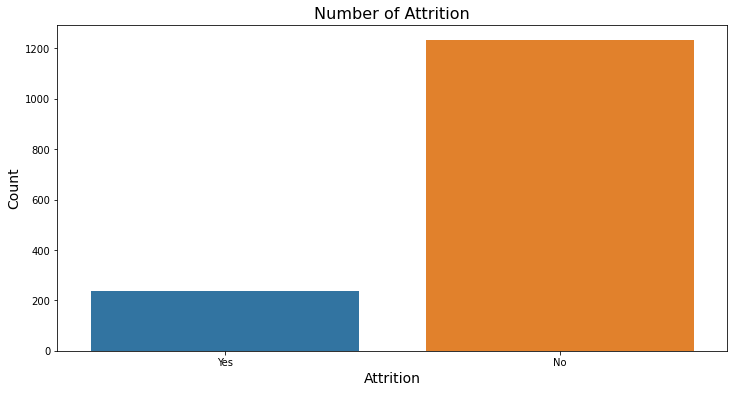

In [19]:
# Plot count
ax = sns.countplot(x=df_employee['Attrition'])

# Set the figure size in inches
ax.figure.set_size_inches(12, 6)

# Set plot features
ax.set_title("Number of Attrition", fontsize=16)
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Attrition", fontsize=14)

# Displays plot
plt.show()

In [20]:
# Separate the data set for easier analysis
df_left = df_employee[df_employee['Attrition'] == 'Yes']
df_stayed = df_employee[df_employee['Attrition'] == 'No']

# Count the number of employees who stayed and left
total_employees_left = df_left.shape[0]
total_employees_stayed = df_stayed.shape[0]
total_employees = df_employee.shape[0]

print('Number of employees who left:', total_employees_left)
print('This is equivalent to {:.2f}% of the total employees'.format((total_employees_left/total_employees)*100))

print('\nNumber of employees who stayed:', total_employees_stayed)
print('This is equivalent to {:.2f}% of the total employees'.format((total_employees_stayed/total_employees)*100))

Number of employees who left: 237
This is equivalent to 16.12% of the total employees

Number of employees who stayed: 1233
This is equivalent to 83.88% of the total employees


**Comment**: As observed, there were much more employees chose to stay in the company. Thus, the dataset was highly imbalanced.


5.2.2 For Numerical Variables:

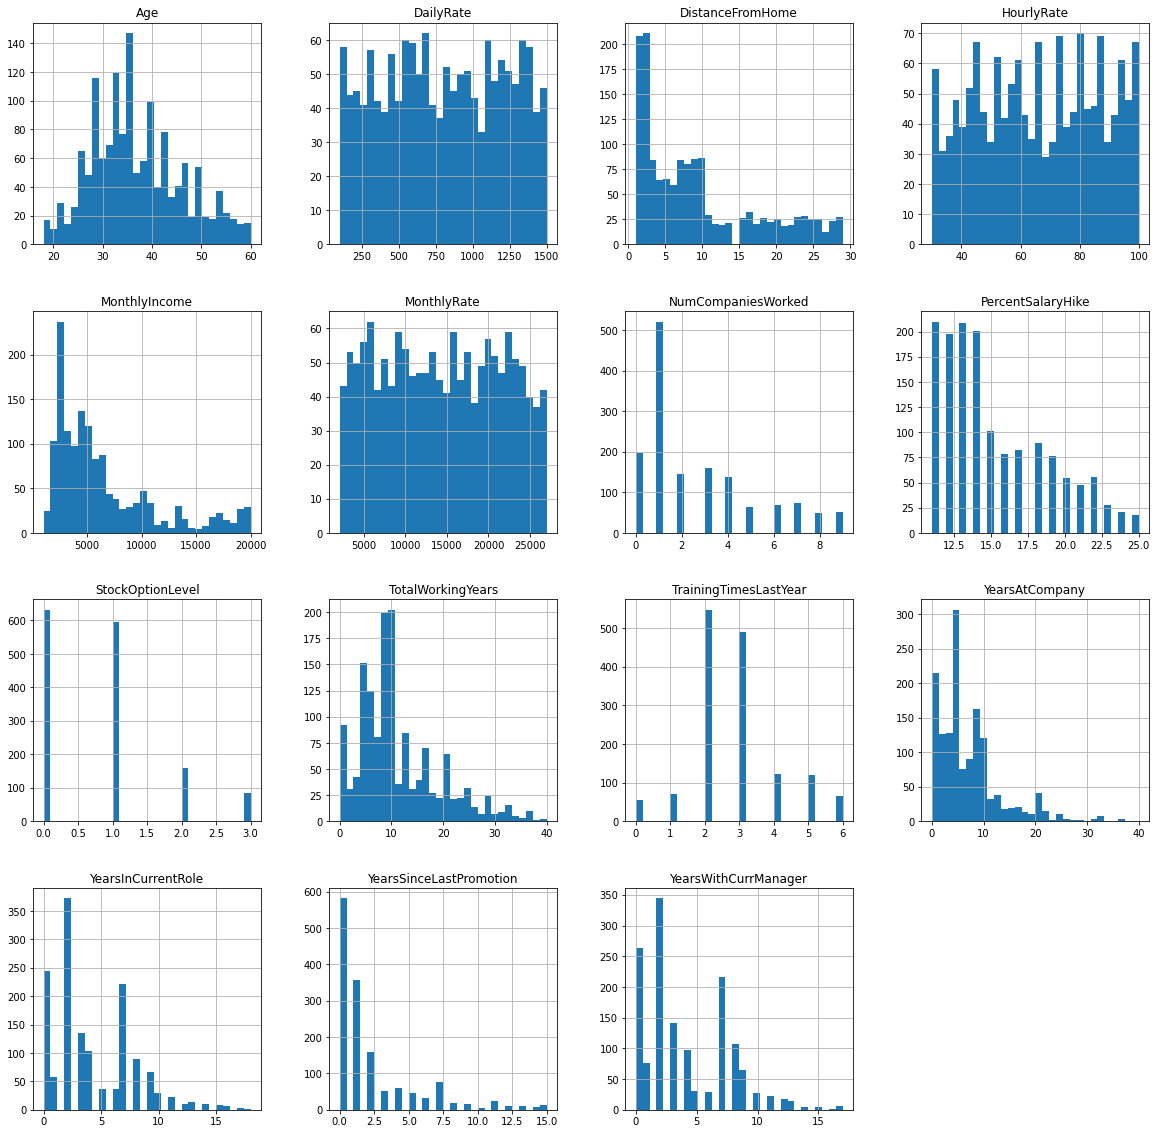

In [21]:
# Plot a histogram for all numerical attributes
univar_histogram = num_attributes.hist(bins=30, figsize=(20,20))

5.2.3 For Categoical Variables:

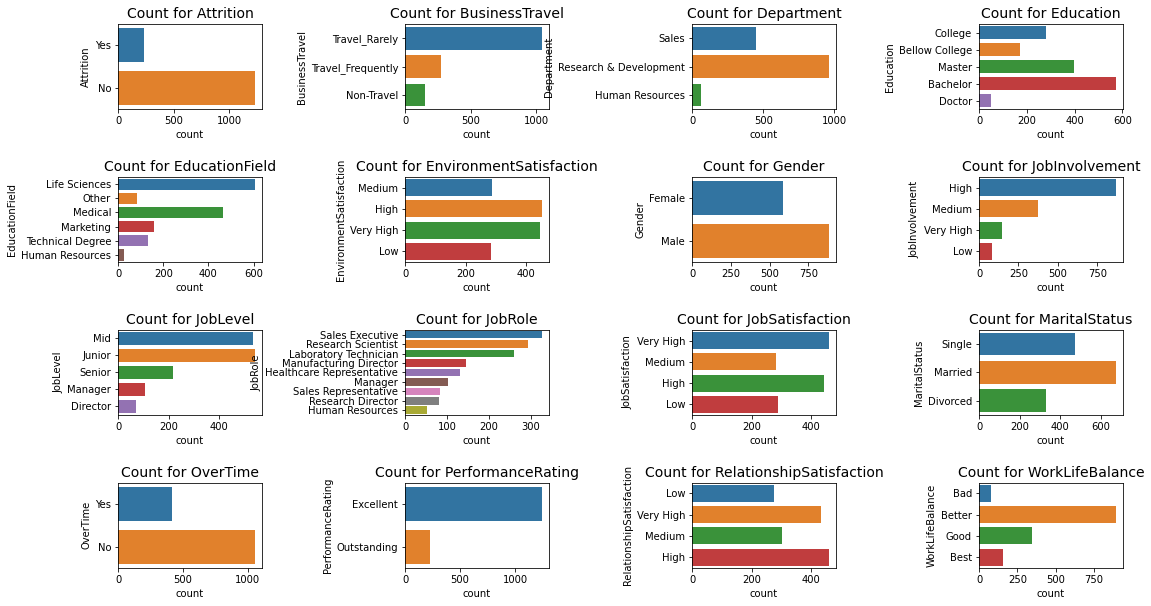

In [22]:
# Set plot size
plt.figure(figsize=(18, 10))

# Set the inital plot position
n = 1

# Iterate over the columns to plot
for column in cat_attributes.columns:
    plt.subplot(4, 4, n)
    _ = sns.countplot(y=cat_attributes[column])
    plt.title("Count for " + column, fontsize=14)
    n += 1

# Adjust height and wdith reserved for space between subplots  
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=1.0)

# Display the plot
plt.show()

#### 5.3 Bivariate Analysis - Hypothesis Validation ####

*H1. People up to 40s tend to leave.*

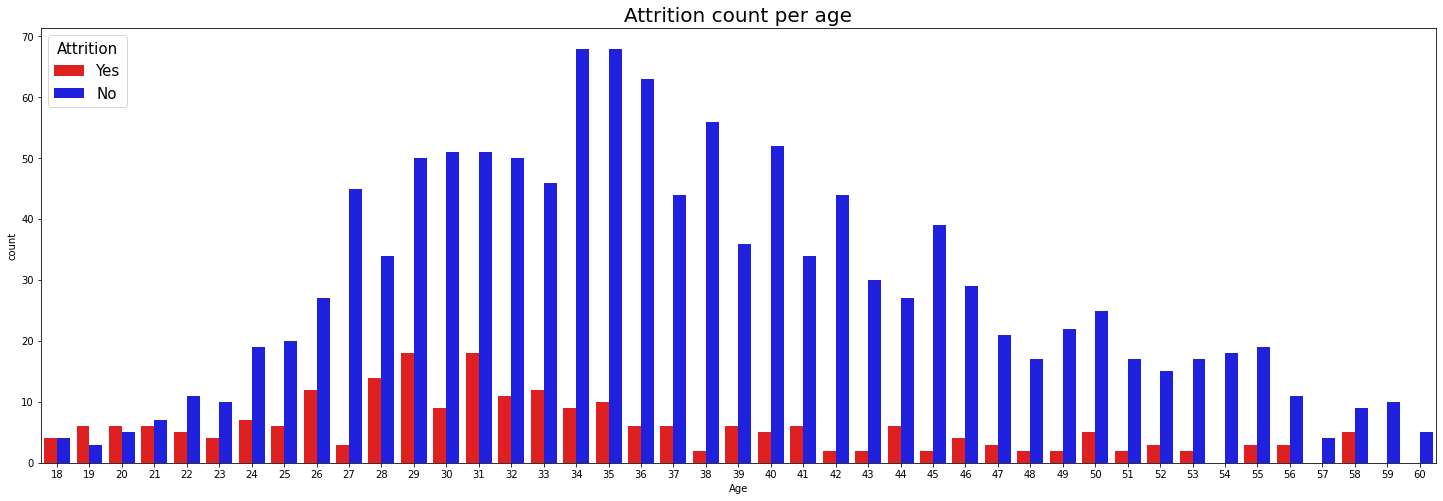

In [23]:
# Use the variable ax for single a Axes
fig, ax = plt.subplots()

# Set the figure size in inches
ax.figure.set_size_inches(25, 8)

# Plot the graph
sns.countplot(x='Age', hue='Attrition', data=df_employee, palette=["r", "b"])

# Set plot title
ax.set_title("Attrition count per age", fontsize=20)

# Set the legend
plt.legend(title="Attrition", title_fontsize=15, fontsize=15)

# Display plots
plt.show()

**Comment**: The overall trend showed that people in young age (up to 40s) tend to leave the company more than people in the elder age. Thus, H1 is **true**.

*H2. People with have higher degree of education tend to leave more.*

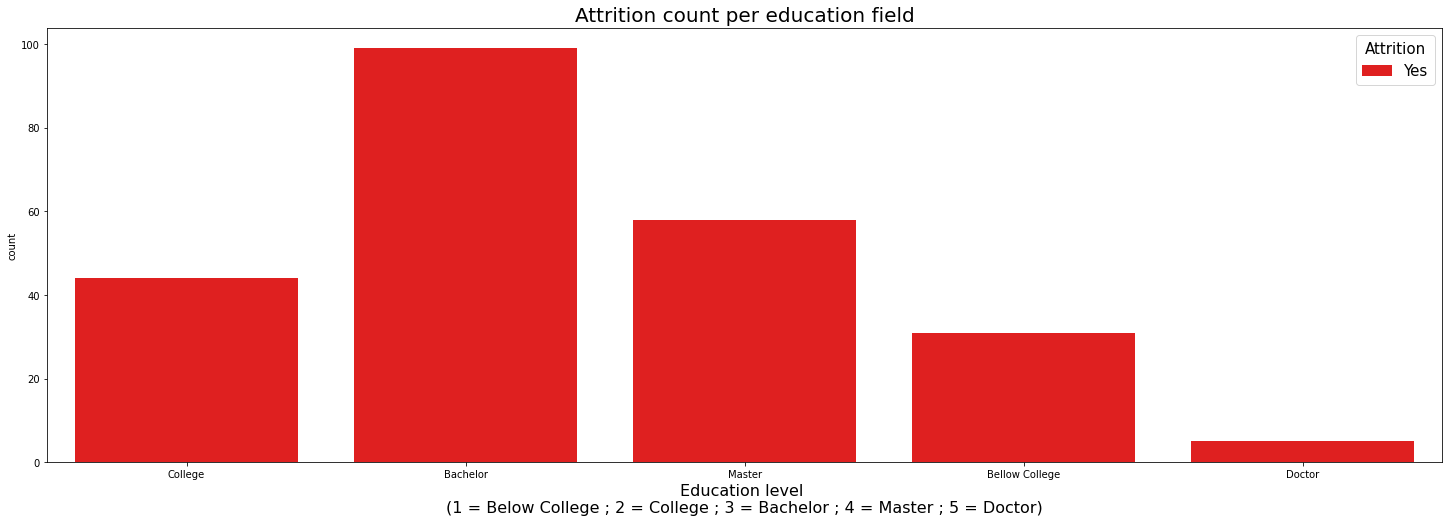

In [24]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size
sns.countplot(x='Education', hue='Attrition', data=df_left, palette=['r']) #Plot the graph
ax.set_title("Attrition count per education field", fontsize=20) #Set plot title
plt.xlabel('Education level \n(1 = Below College ; 2 = College ; 3 = Bachelor ; 4 = Master ; 5 = Doctor)', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: As indicated by above figure, employee with Bachelor degree tend to leave more than others. Thus, H2 is **false**.

*H3. People who live far from work tend to leave.*

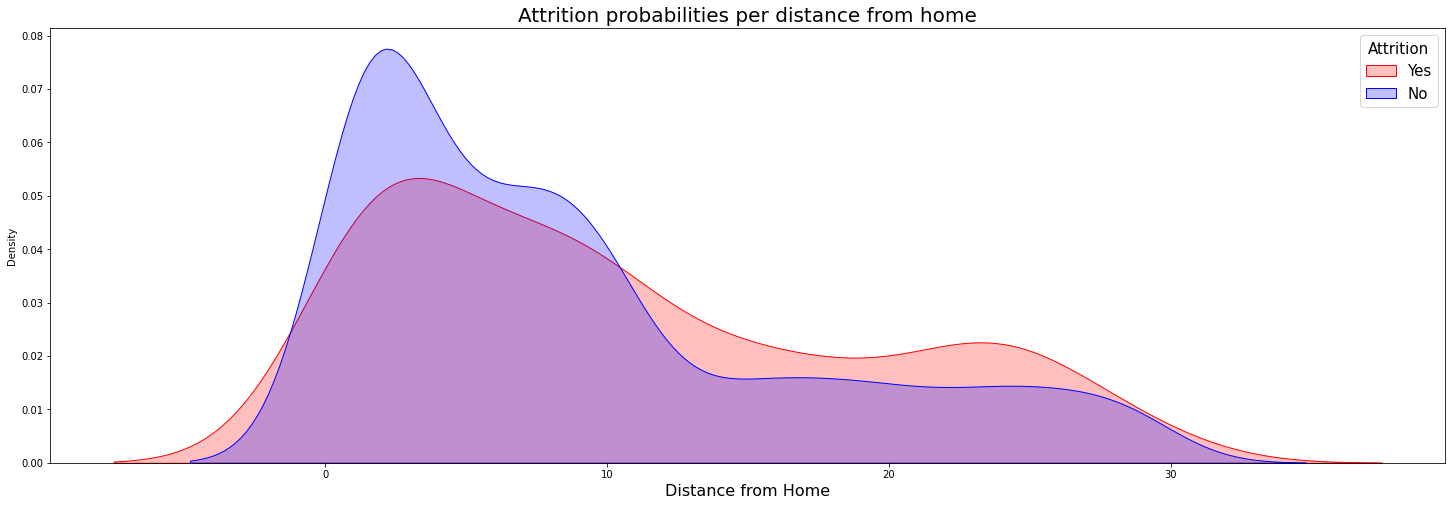

In [25]:
# Plot KDE (Kernel Density Estimate) to visualize the Probability Density of continuos variable
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size

sns.kdeplot(df_left['DistanceFromHome'], label='Yes', shade=True, color='r')
sns.kdeplot(df_stayed['DistanceFromHome'], label='No', shade=True, color='b')

ax.set_title("Attrition probabilities per distance from home", fontsize=20) #Set plot title
plt.xlabel('Distance from Home', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: The above plot indicated that people who live far away from the company (ranging from the distance of 12 to 35) had larger density probability to leave company. Thus, H3 is **True**.

*H4. Single people tend to leave.*

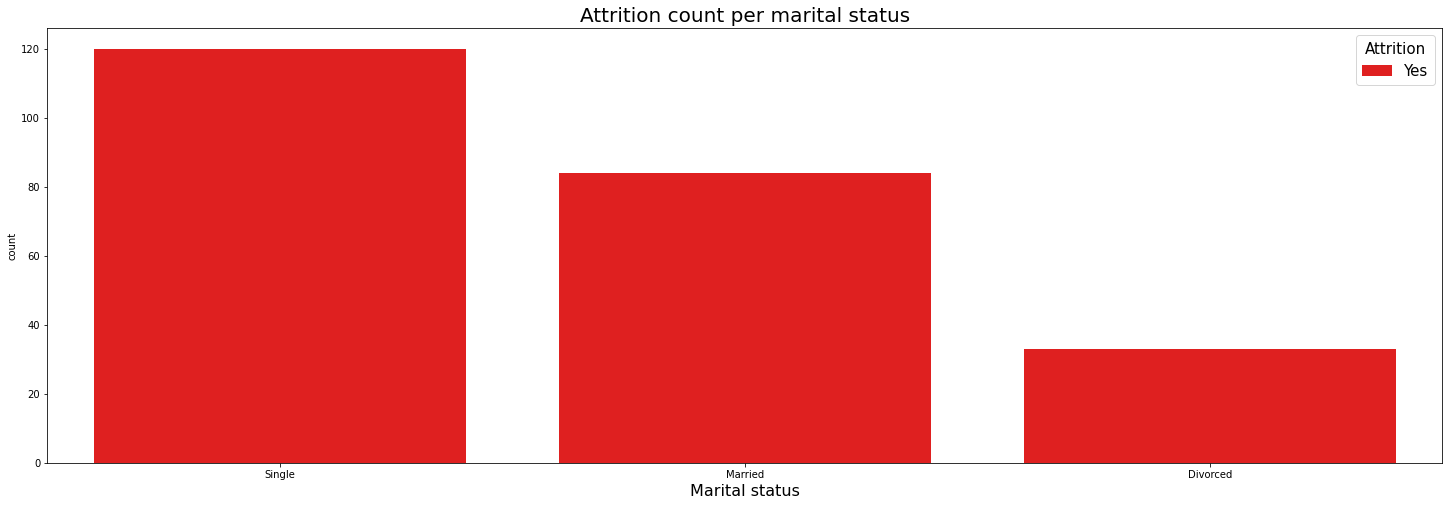

In [26]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size
sns.countplot(x='MaritalStatus', hue='Attrition', data=df_left, palette=['r']) #Plot the graph
ax.set_title("Attrition count per marital status", fontsize=20) #Set plot title
plt.xlabel('Marital status', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: As observed, single people tend to leave more than married and divorced. Thus, H4 is **True**.

*H5. People who make overtime tend to leave more.*

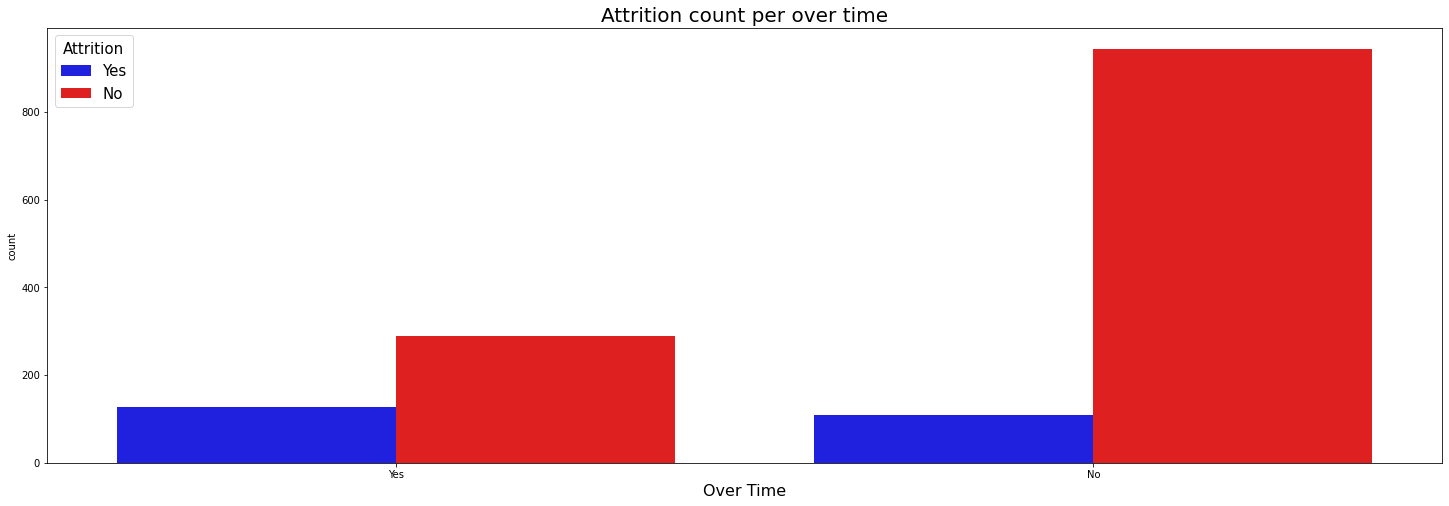

In [27]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size
sns.countplot(x='OverTime', hue='Attrition', data=df_employee, palette=['b','r']) #Plot the graph
ax.set_title("Attrition count per over time", fontsize=20) #Set plot title
plt.xlabel('Over Time', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: The above figure showed that in both cases, more people tended to stay in the company. However, the attrition occurrences did become higher when people had to make overtime. Thus, H5 is **true**.

*H6. People who present higher performance ratings tend to leave more.*

*H7. People who present lower performance ratings tend to leave more.*

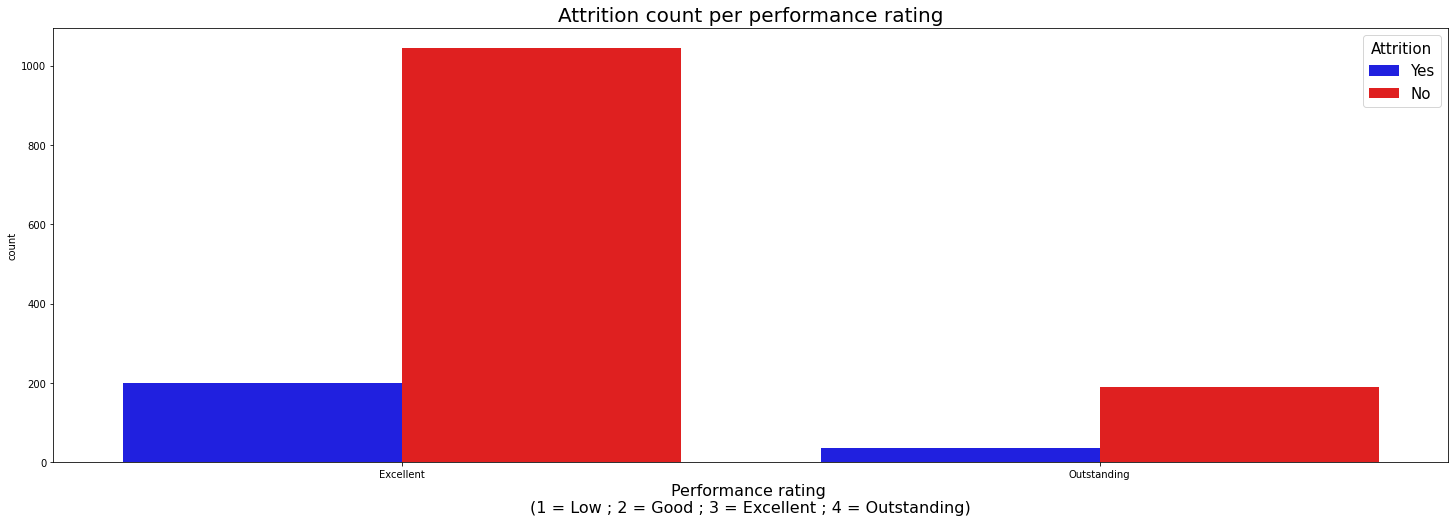

In [28]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size
sns.countplot(x='PerformanceRating', hue='Attrition', data=df_employee, palette=['b','r']) #Plot the graph
ax.set_title("Attrition count per performance rating", fontsize=20) #Set plot title
plt.xlabel('Performance rating \n(1 = Low ; 2 = Good ; 3 = Excellent ; 4 = Outstanding)', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: In the dataset, there are only ratings for 'Excellen' and 'Outstanding'. It was concluded that people presenting high performance ratings tend to stay, while people who presented 'Outstanding' performance ratings stayed far less.
Thus, H6 is **false** and H7 is **true**.

*H8. People who have lower job level tend to leave more.*

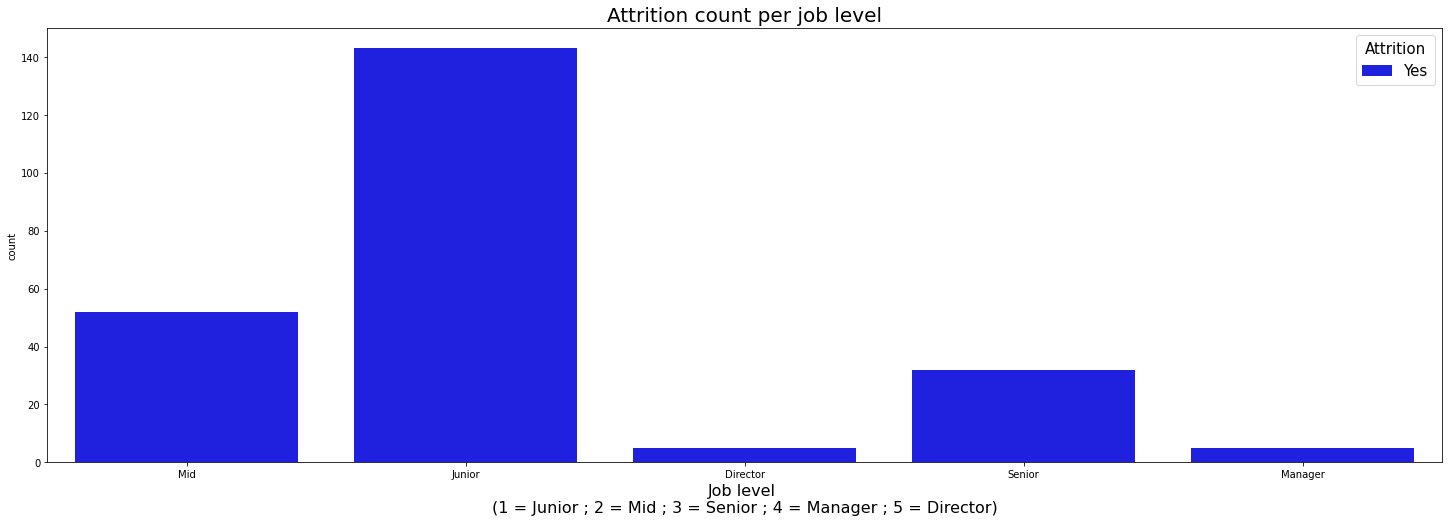

In [29]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size
sns.countplot(x='JobLevel', hue='Attrition', data=df_left, palette=['b']) #Plot the graph
ax.set_title("Attrition count per job level", fontsize=20) #Set plot title
plt.xlabel('Job level \n(1 = Junior ; 2 = Mid ; 3 = Senior ; 4 = Manager ; 5 = Director)', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

The above plot showed that the people with 'Mid' and 'Junior' level tend to leave more. Thus, H8 is **true**.

*H9. People who weren't promoted for long time tend to leave more.*

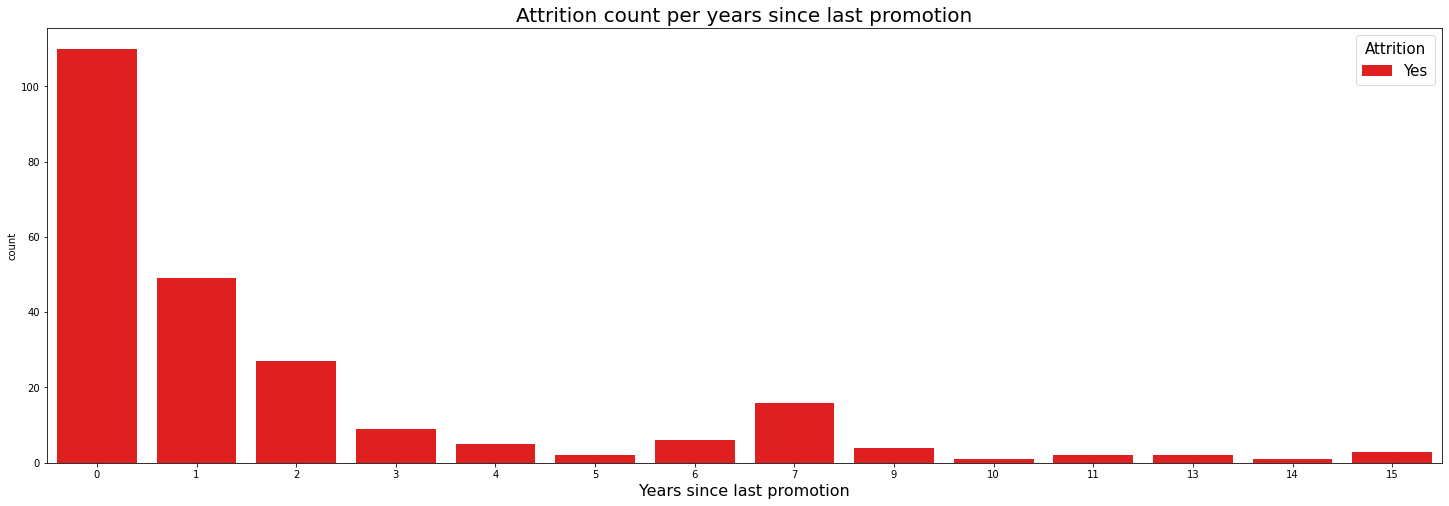

In [30]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df_left, palette=['r']) #Plot the graph
ax.set_title("Attrition count per years since last promotion", fontsize=20) #Set plot title
plt.xlabel('Years since last promotion', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: The above plot showed that the maximum count of attrition occured for people promoted in 0 or 1 years. Thus, H9 is **false**.

*H10. People who are in the current role for long time tend to leave more.*

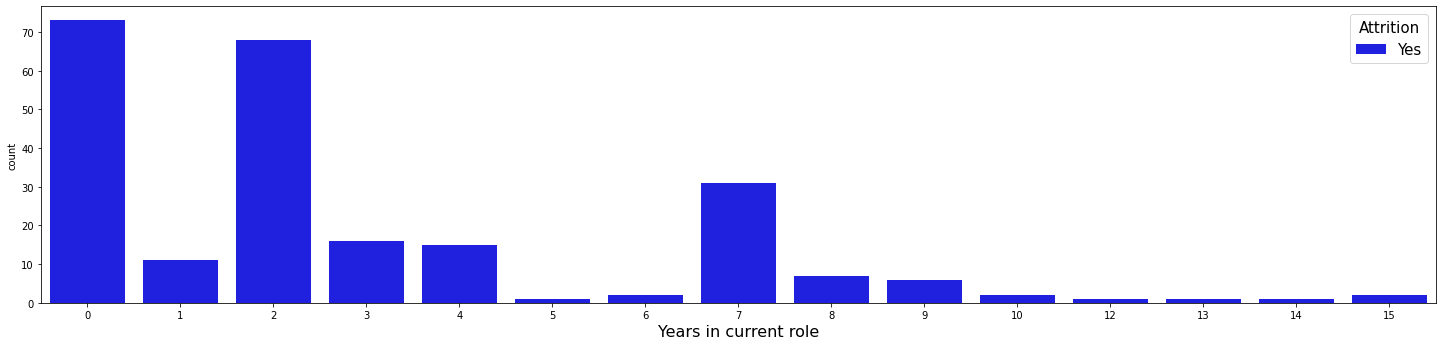

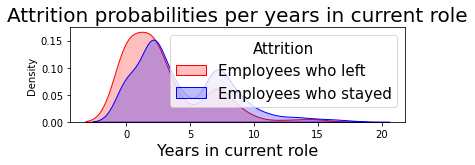

In [31]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size

plt.subplot(2,1,1)
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df_left, palette=['b']) #Plot the graph
ax.set_title("Attrition count per years in current role", fontsize=20) #Set plot title
plt.xlabel('Years in current role', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

# Plot KDE
plt.subplot(2,1,2)
ax = sns.kdeplot(df_left['YearsInCurrentRole'], label='Employees who left', shade=True, color='r')
ax = sns.kdeplot(df_stayed['YearsInCurrentRole'], label='Employees who stayed', shade=True, color='b')
ax.set_title("Attrition probabilities per years in current role", fontsize=20) #Set plot title
plt.xlabel('Years in current role', fontsize=16) #Set x label
plt.legend(title="Attrition", title_fontsize=15, fontsize=15)
plt.subplots_adjust(hspace = 0.3) #Adjust vertical space between plots
plt.show()

**Comment**: As indicated in KDE plot, the peak for attrition occurs in the people in the early years (0-2 years) of the work. People who were in the current role for a long time tended not to leave. Thus, H10 is **false**.

*H11. People who feel less involved with the job tend to leave more.*

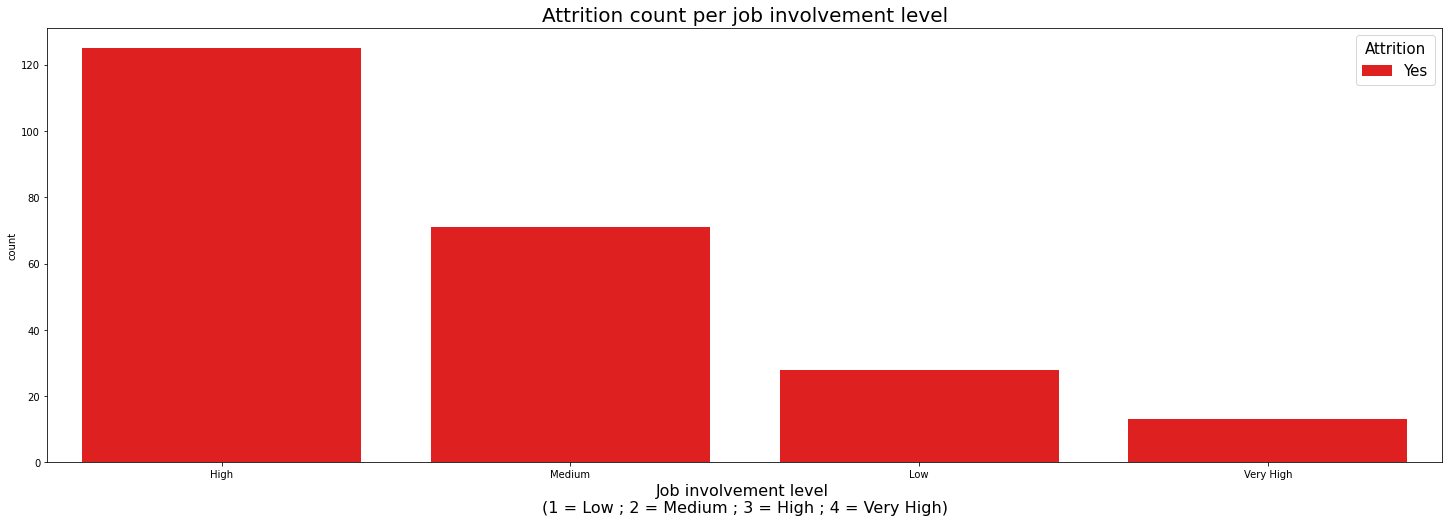

In [32]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size
sns.countplot(x='JobInvolvement', hue='Attrition', data=df_left, palette=['r']) #Plot the graph
ax.set_title("Attrition count per job involvement level", fontsize=20) #Set plot title
plt.xlabel('Job involvement level \n(1 = Low ; 2 = Medium ; 3 = High ; 4 = Very High)', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: The plot showed that people with high involvement tend to leave more. Thus, H11 is **false**.

*H12. People who feel less satisfied with the job tend to leave more.*

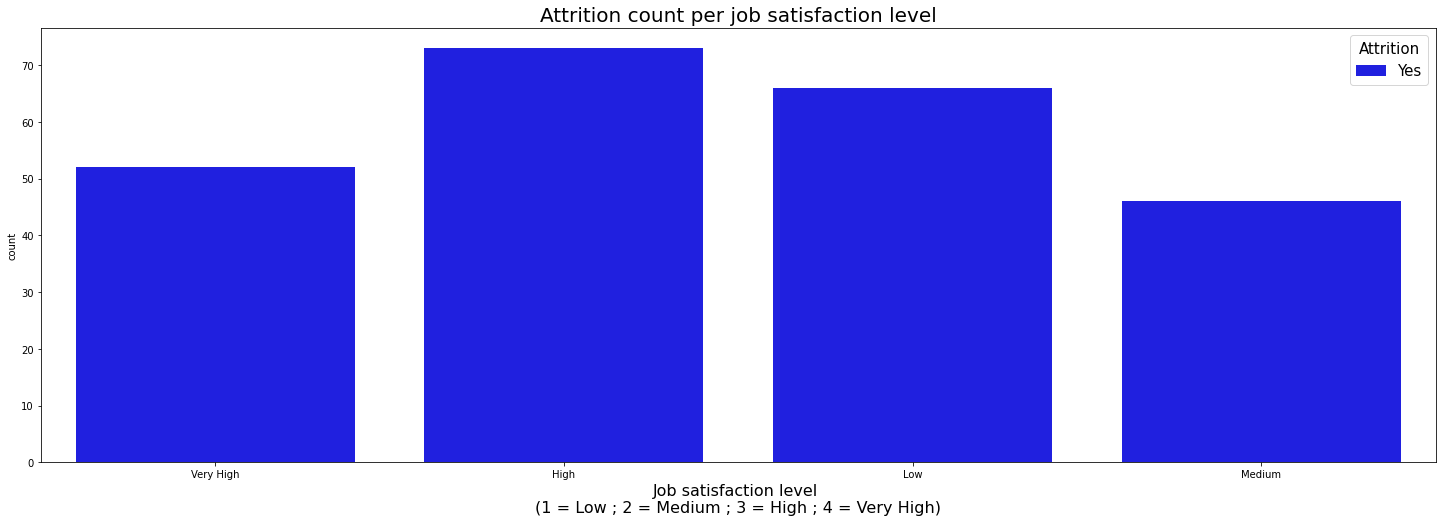

In [33]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df_left, palette=['b']) #Plot the graph
ax.set_title("Attrition count per job satisfaction level", fontsize=20) #Set plot title
plt.xlabel('Job satisfaction level \n(1 = Low ; 2 = Medium ; 3 = High ; 4 = Very High)', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

The above plot indicated that people with less satisfication don't tend to leave more. Thus, H12 is **false**.

*H13. People who feel less satisfied with the environment tend to leave more.*

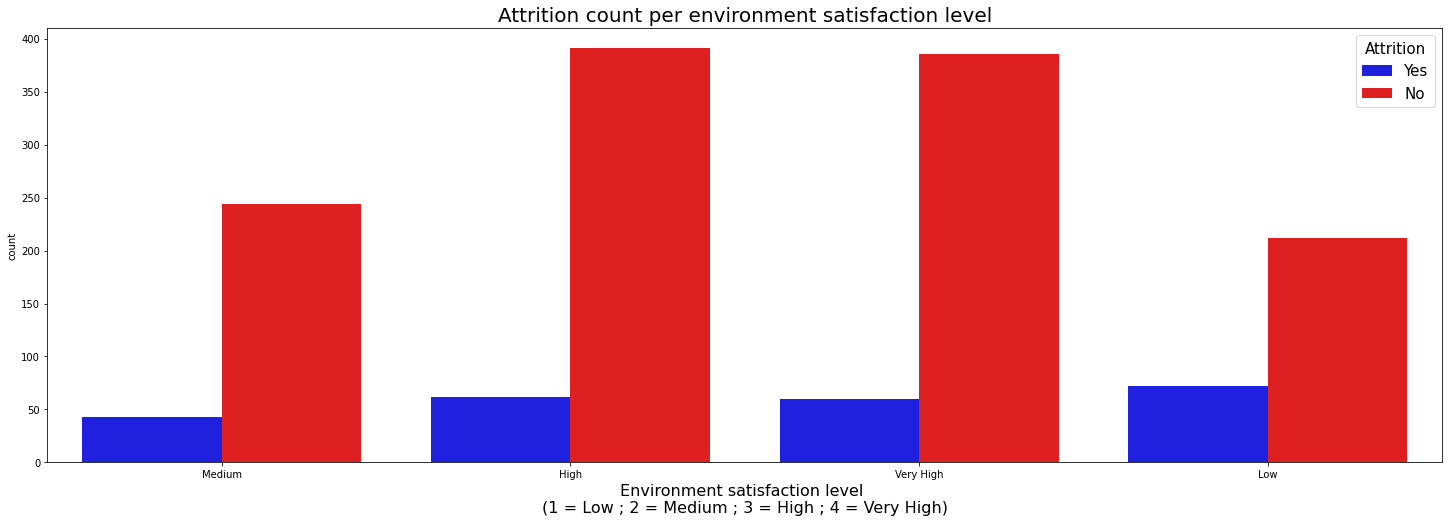

In [34]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df_employee, palette=['b','r']) #Plot the graph
ax.set_title("Attrition count per environment satisfaction level", fontsize=20) #Set plot title
plt.xlabel('Environment satisfaction level \n(1 = Low ; 2 = Medium ; 3 = High ; 4 = Very High)', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: The plot showed that employees with low environmental satisfication comparatively tend to leave, especially when their total sample population were small. Thus, H13 is **true**.

*H14. People with lower work life balance tend to leave more.*

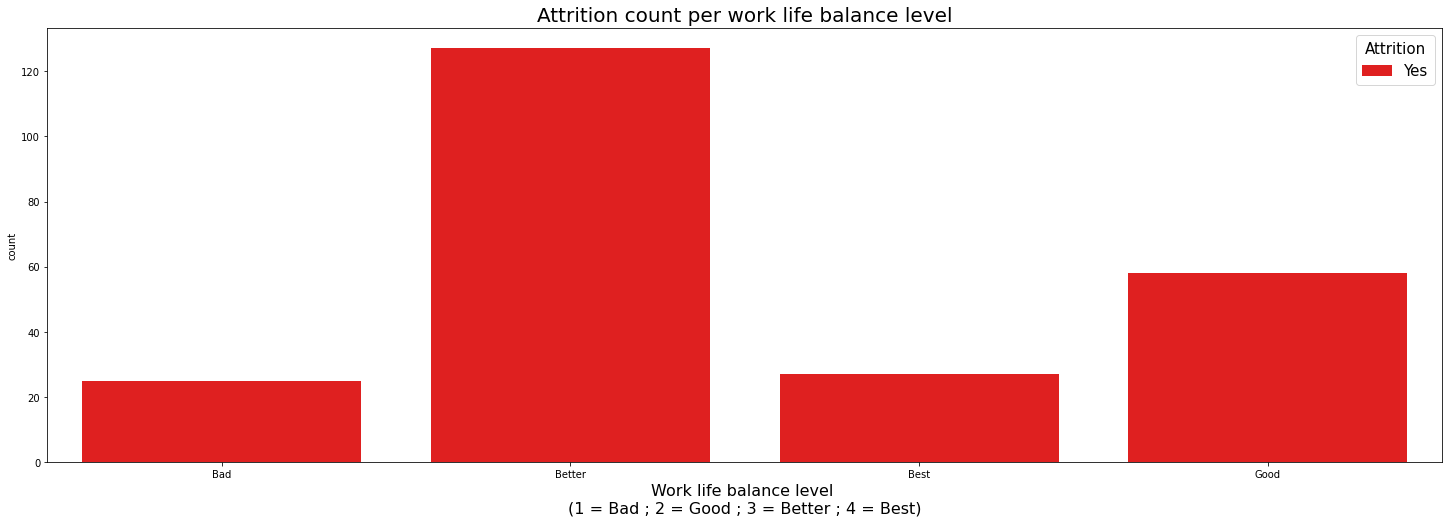

In [35]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 8) #Set the figure size
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df_left, palette=['r']) #Plot the graph
ax.set_title("Attrition count per work life balance level", fontsize=20) #Set plot title
plt.xlabel('Work life balance level \n(1 = Bad ; 2 = Good ; 3 = Better ; 4 = Best)', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

As observed, people with 'better' work life balance tend to leave more. Thus, H14 is **false**.

*H15. People who professionally worked for more years tend to not leave.*

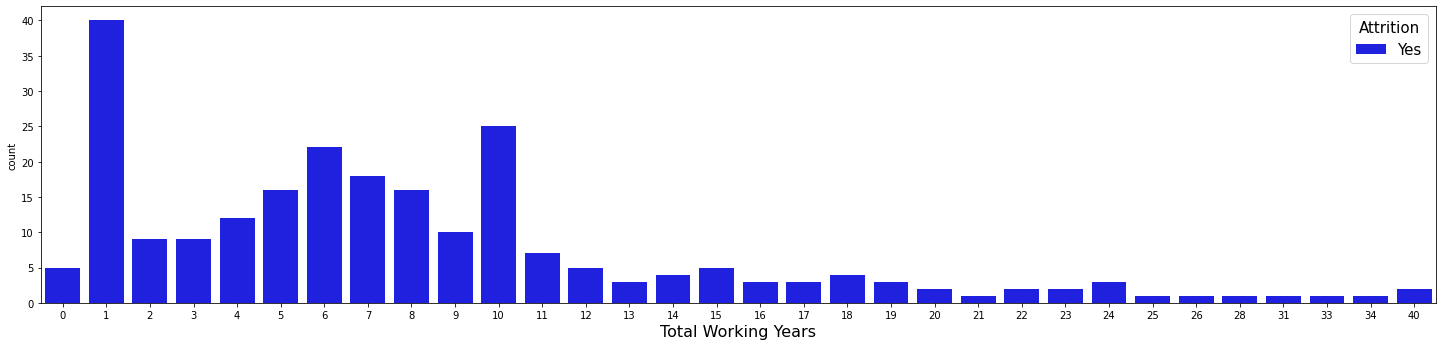

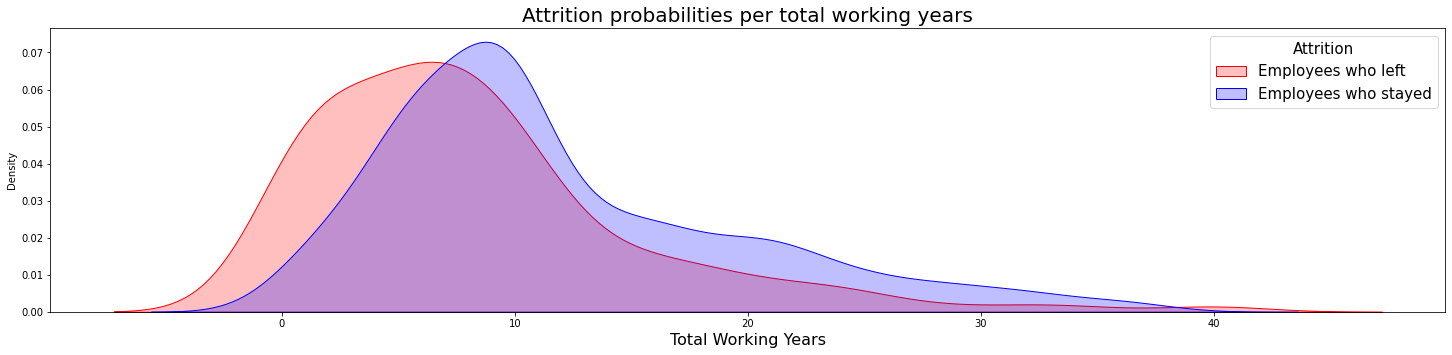

In [36]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size

plt.subplot(2,1,1)
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=df_left, palette=['b']) #Plot the graph
ax.set_title("Attrition count per total working years", fontsize=20) #Set plot title
plt.xlabel('Total Working Years', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

# Plot KDE
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size
plt.subplot(2,1,2)
ax = sns.kdeplot(df_left['TotalWorkingYears'], label='Employees who left', shade=True, color='r')
ax = sns.kdeplot(df_stayed['TotalWorkingYears'], label='Employees who stayed', shade=True, color='b')
ax.set_title("Attrition probabilities per total working years", fontsize=20) #Set plot title
plt.xlabel('Total Working Years', fontsize=16) #Set x label
plt.legend(title="Attrition", title_fontsize=15, fontsize=15)
plt.subplots_adjust(hspace = 0.3) #Adjust vertical space between plots
plt.show()

The above plots showed that people who professionally worked for more years tend to not leave. In addition, up to 10 years working professionally, people tend to leave more. Thus, H15 is **true**.

*H16. People who worked at the same company for more years tend not to leave.*

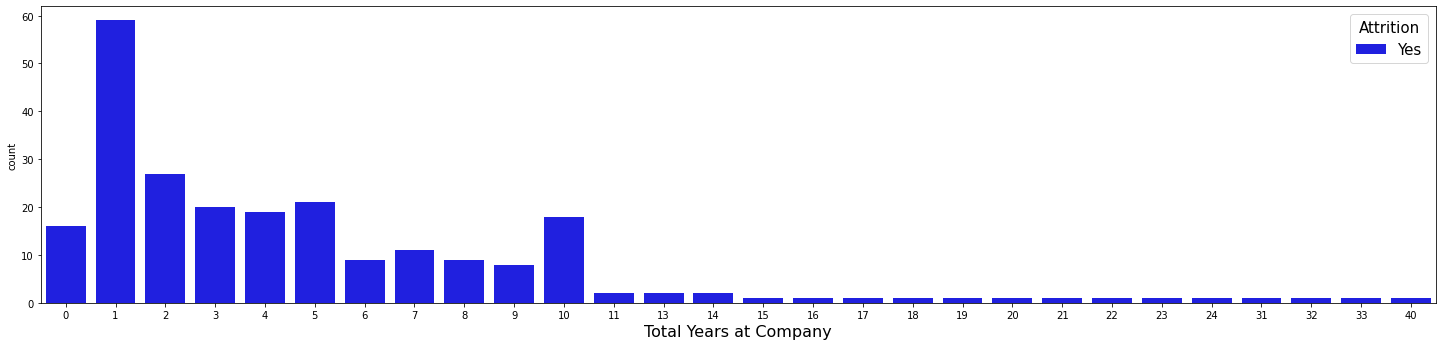

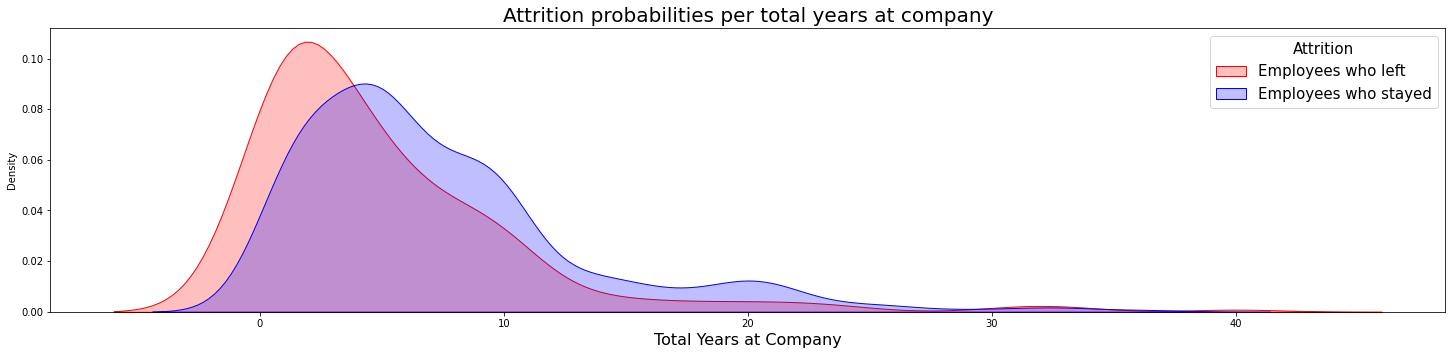

In [37]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size

plt.subplot(2,1,1)
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df_left, palette=['b']) #Plot the graph
ax.set_title("Attrition count per total years at company", fontsize=20) #Set plot title
plt.xlabel('Total Years at Company', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

# Plot KDE
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size
plt.subplot(2,1,2)
ax = sns.kdeplot(df_left['YearsAtCompany'], label='Employees who left', shade=True, color='r')
ax = sns.kdeplot(df_stayed['YearsAtCompany'], label='Employees who stayed', shade=True, color='b')
ax.set_title("Attrition probabilities per total years at company", fontsize=20) #Set plot title
plt.xlabel('Total Years at Company', fontsize=16) #Set x label
plt.legend(title="Attrition", title_fontsize=15, fontsize=15)
plt.subplots_adjust(hspace = 0.3) #Adjust vertical space between plots
plt.show()

**Comment**: The above plots indicated that people worked at same company for more years were less likely to leave. Thus, H16 is **true**.

*H17. People who are job hoppers tend to leave.*

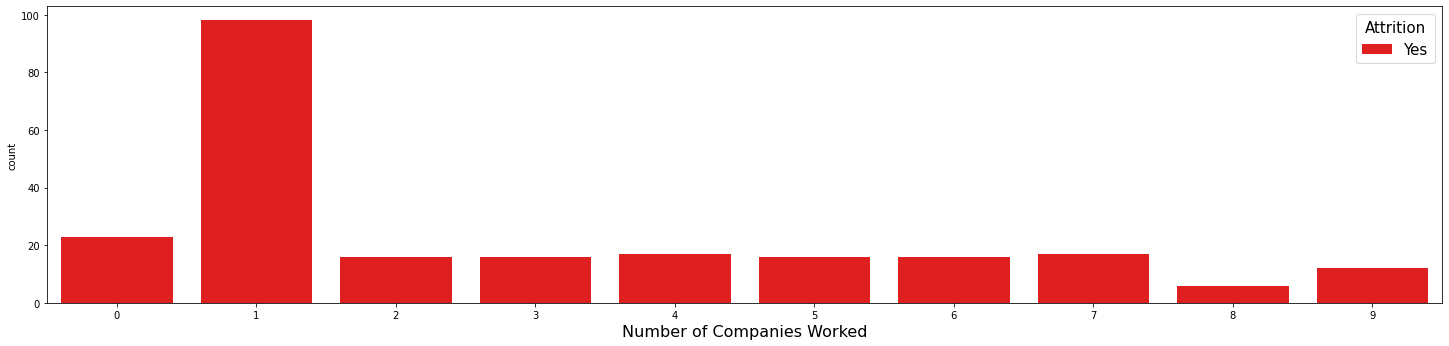

In [38]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size

plt.subplot(2,1,1)
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df_left, palette=['r']) #Plot the graph
ax.set_title("Attrition count per number of companies the employee has worked", fontsize=20) #Set plot title
plt.xlabel('Number of Companies Worked', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: The plot showed that people who were job hoppers tend to leave less. Thus, H17 is **false**.

*H18. People with higher salary tend not to leave.*

In [39]:
# Separate data
df_leaves_hourly_rate = df_employee[['Attrition','HourlyRate']]
df_leaves_daily_rate = df_employee[['Attrition','DailyRate']]
df_leaves_monthly_rate = df_employee[['Attrition','MonthlyRate']]

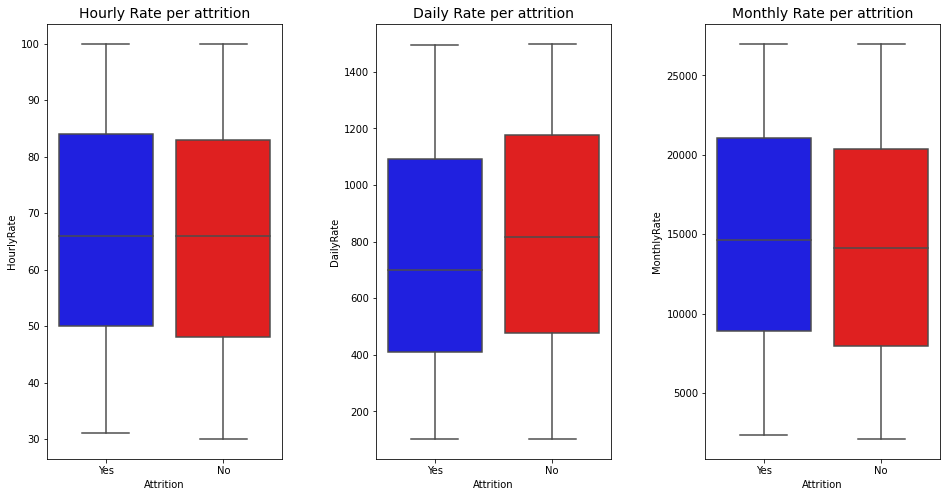

In [40]:
# Use the variable ax for single a Axes
fig, ax = plt.subplots()

# Set the figure size in inches
ax.figure.set_size_inches(16, 8)

# Plot a box plot
plt.subplot(1, 3, 1)
ax = sns.boxplot(x='Attrition', y='HourlyRate',  palette=['b', 'r'], data=df_leaves_hourly_rate)
ax.set_title("Hourly Rate per attrition", fontsize=14)

plt.subplot(1, 3, 2)
ax = sns.boxplot(x='Attrition', y='DailyRate',  palette=['b', 'r'], data=df_leaves_daily_rate)
ax.set_title("Daily Rate per attrition", fontsize=14)

plt.subplot(1, 3, 3)
ax = sns.boxplot(x='Attrition', y='MonthlyRate',  palette=['b', 'r'], data=df_leaves_monthly_rate)
ax.set_title("Monthly Rate per attrition", fontsize=14)

# Adjust the width spaces between plots
plt.subplots_adjust(wspace = 0.4)

# Display the plots
plt.show()

**Comment**: The box plots showed that people who were daily making more money tend to stay, and the median for hourly rate and monthly rate are quite similar. Thus, H18 is **true**.

*H19. People who have shorter salary hike range tend to leave.*

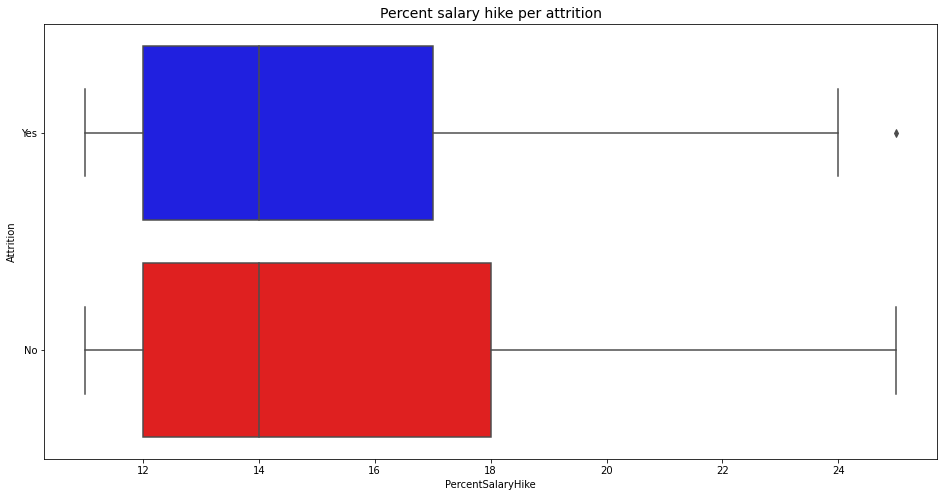

In [41]:
# Separate data
df_leaves_salary_hike = df_employee[['Attrition','PercentSalaryHike']]

# Plot the boxplot 
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(16, 8) #Figure size
ax = sns.boxplot(x='PercentSalaryHike', y='Attrition', palette=['b', 'r'], data=df_leaves_salary_hike)
ax.set_title("Percent salary hike per attrition", fontsize=14)
plt.show()

**Comment**: The above boxplot showed that people with shorter salary hike range tend to leave. Thus, H19 is **true**.

*H20. People who didn't receive training for long years tend to leave more.*

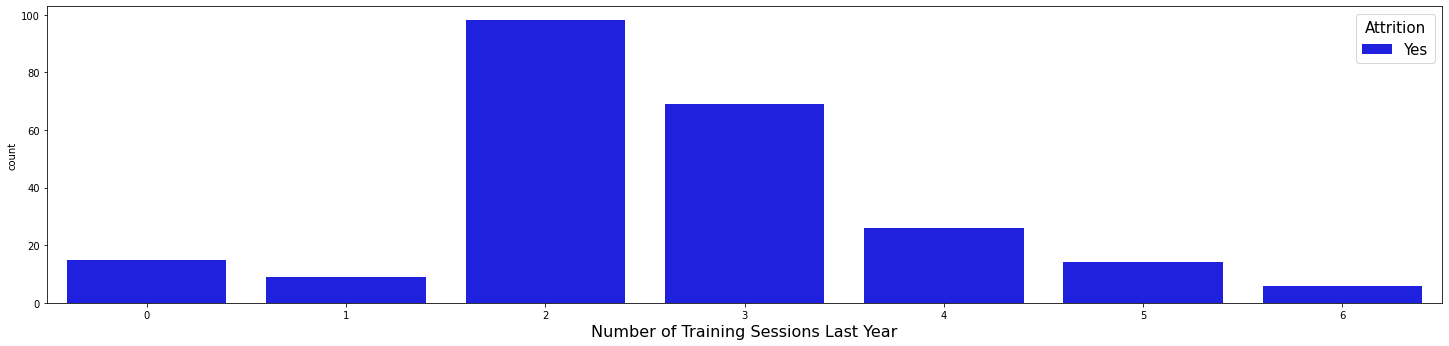

In [42]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size

plt.subplot(2,1,1)
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=df_left, palette=['b']) #Plot the graph
ax.set_title("Attrition count per training sessions last year", fontsize=20) #Set plot title
plt.xlabel('Number of Training Sessions Last Year', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: People who received few and many training sessions last year tend to stay. However, people in the middle tend to leave. Thus, H20 is **false**.

H21. People who have been working for the same manager for short years tend to leave more.

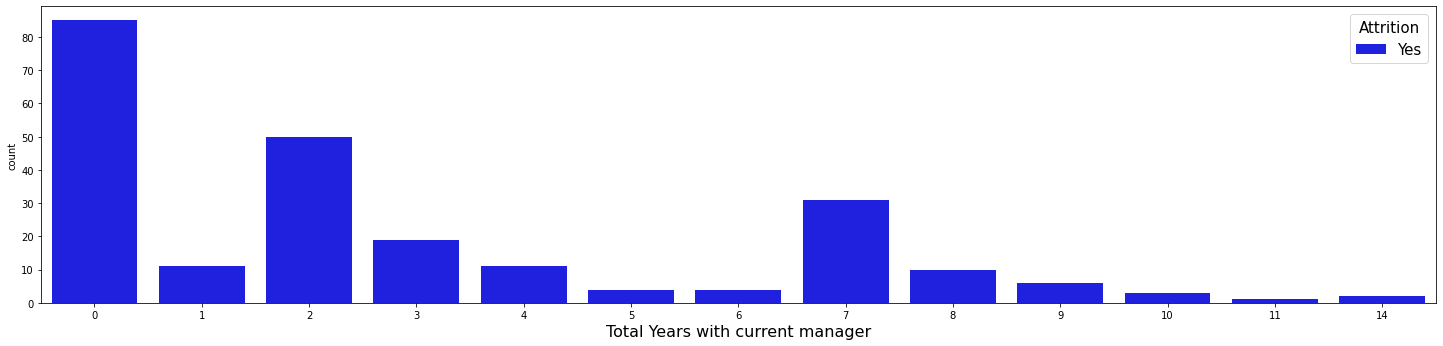

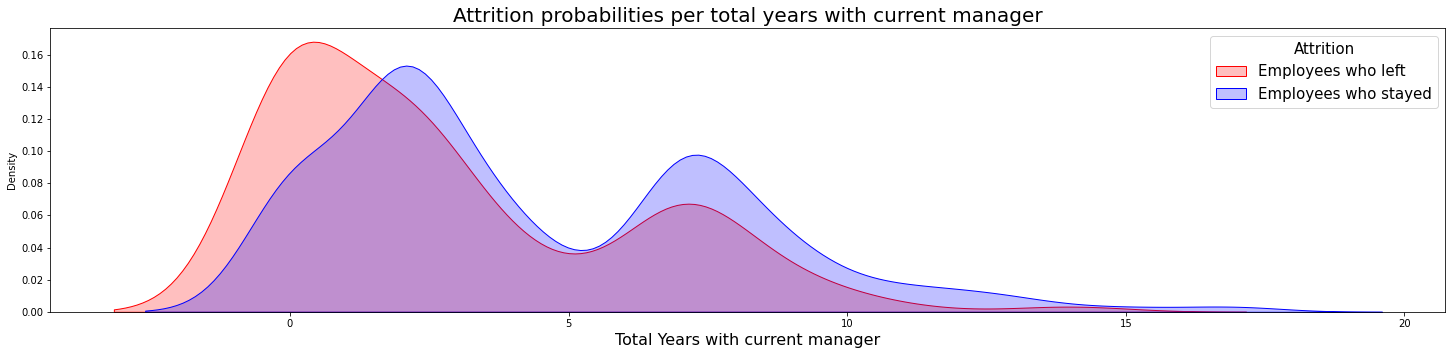

In [43]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size

plt.subplot(2,1,1)
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df_left, palette=['b']) #Plot the graph
ax.set_title("Attrition count per total years with current manager", fontsize=20) #Set plot title
plt.xlabel('Total Years with current manager', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

# Plot KDE
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size
plt.subplot(2,1,2)
ax = sns.kdeplot(df_left['YearsWithCurrManager'], label='Employees who left', shade=True, color='r')
ax = sns.kdeplot(df_stayed['YearsWithCurrManager'], label='Employees who stayed', shade=True, color='b')
ax.set_title("Attrition probabilities per total years with current manager", fontsize=20) #Set plot title
plt.xlabel('Total Years with current manager', fontsize=16) #Set x label
plt.legend(title="Attrition", title_fontsize=15, fontsize=15)
plt.subplots_adjust(hspace = 0.3) #Adjust vertical space between plots
plt.show()

**Comment**: As observed, people who have been working for the same manager for short years tend to leave more. Thus, H21 is **true**.

*H22. People who have lower quality of relationship with the manager tend to leave more.*

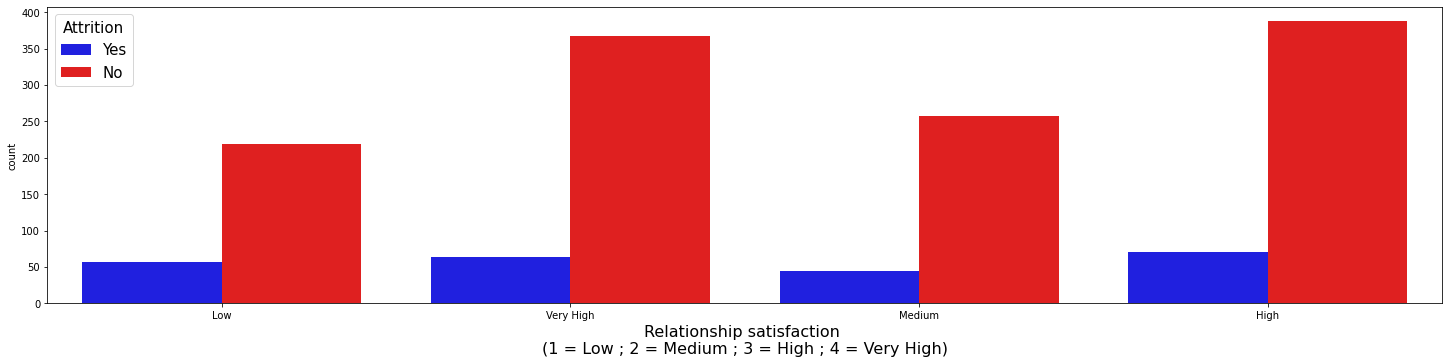

In [44]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size

plt.subplot(2,1,1)
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df_employee, palette=['b', 'r']) #Plot the graph
ax.set_title("Attrition count per relationship with current manager satisfaction", fontsize=20) #Set plot title
plt.xlabel('Relationship satisfaction \n(1 = Low ; 2 = Medium ; 3 = High ; 4 = Very High)', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: As observed, people who have lower quality of relationship with the manager tend to leave. Thus, H22 is **true**.

*H23. People who travel more frequently tend to leave more.*


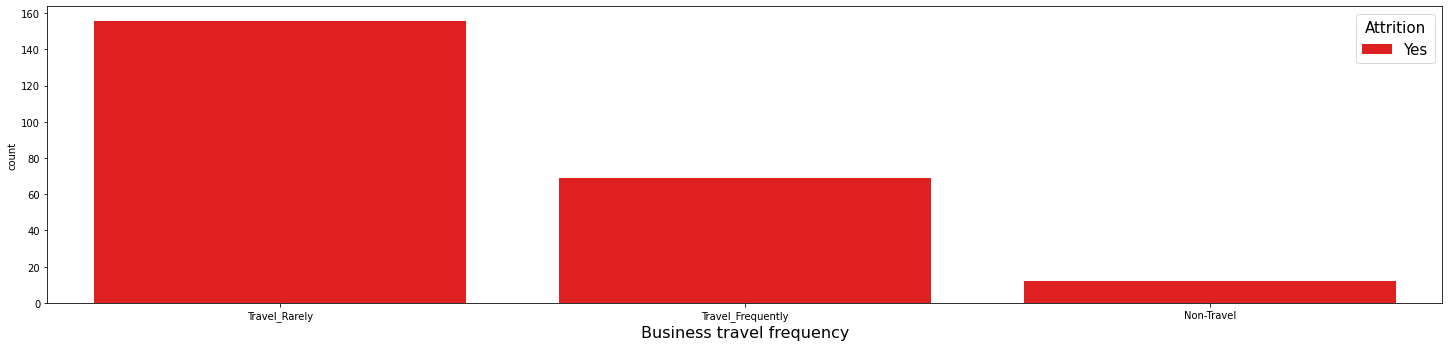

In [45]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size

plt.subplot(2,1,1)
sns.countplot(x='BusinessTravel', hue='Attrition', data=df_left, palette=['r']) #Plot the graph
ax.set_title("Attrition count per business travel frequency", fontsize=20) #Set plot title
plt.xlabel('Business travel frequency', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plot

**Comment**: The above plot showed that people who travel frequently was less likely to leave. Thus, H23 is **false**.

*H24. Which departments has more attrition?*

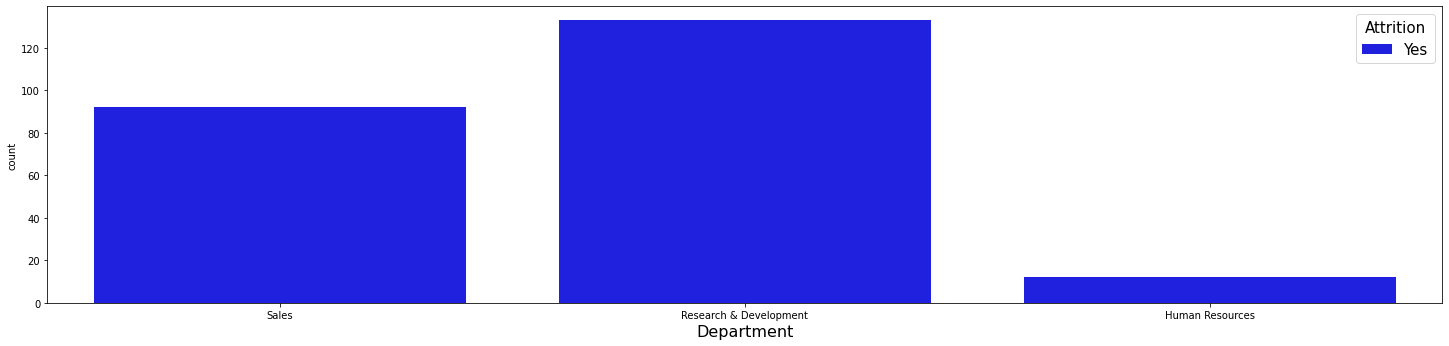

In [46]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size

plt.subplot(2,1,1)
sns.countplot(x='Department', hue='Attrition', data=df_left, palette=['b']) #Plot the graph
ax.set_title("Attrition count per department", fontsize=20) #Set plot title
plt.xlabel('Department', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: The above plot indicated that 'Research & Development' had more attritions than other departments.

*H25. Which education field has more attrition?*

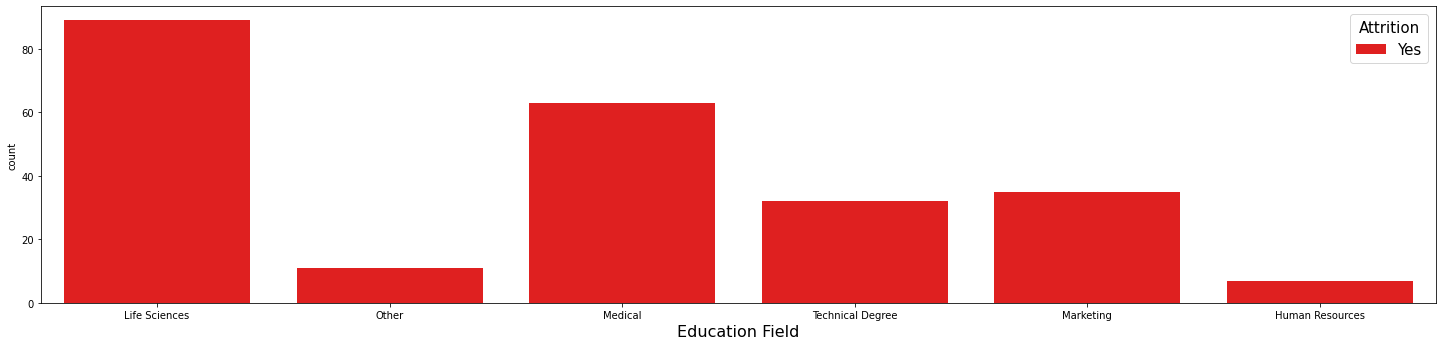

In [47]:
# Plot the graph
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(25, 12) #Set the figure size

plt.subplot(2,1,1)
sns.countplot(x='EducationField', hue='Attrition', data=df_left, palette=['r']) #Plot the graph
ax.set_title("Attrition count per education field", fontsize=20) #Set plot title
plt.xlabel('Education Field', fontsize=16) #Set xlabel
plt.legend(title="Attrition", title_fontsize=15, fontsize=15) #Set the legend
plt.show() #Display plots

**Comment**: The above plot indicated that 'Life Science' had more attritions than other fields.

**Summary of Bivariate Analysis:**

|  | Hypothesis  |Conclusion | 
| ------------- | ------------- |------------- | 
| H1| People up to 40s tend to leave |True |
| H2| People with have higher degree of education tend to leave more  |False |
| H3| People who live far from work tend to leave  |True |
| H4 | Single people tend to leave more  |True  | 
| H5 | People who make overtime tend to leave more  |False    | 
| H6| People who present higher performance ratings tend to leave more |False    |
| H7 | People who present lower performance ratings tend to leave more  |True  |
| H8 | People who have lower job level tend to leave more  |True |
| H9| People who weren't promoted for long time tend to leave more |False |
| H10 | People who are in the current role for long time tend to leave more |False |
| H11 | People who feel less involved with the job tend to leave more | False  |
| H12 | People who feel less satisfied with the job tend to leave more  |False    |
| H13 | People who feel less satisfied with the environment tend to leave more  |True |
| H14 | People who have lower work life balance tend to leave more | False  |
| H15 | People who professionally worked for more years tend to not leave  |True  |
| H16 | People who worked at the same company for more years tend not to leave |True |
| H17 | People who are job hoppers tend to leave more  |False  |
| H18 | People who are making more money tend not to leave  |True |
| H19 | People who have shorter salary hike range tend to leave  |True  |
| H20 | People who received less training last year tend to leave more  |False  |
| H21 | People who have been working for the same manager for short years tend to leave more  |True|
| H22 | People who have lower quality of relationship with the manager tend to leave more |True  |
| H23 | People who travel more frequently tend to leave more |False|
| H24 | Which departments has more attrition? |Research&Development|
| H25 | Which education field has more attrition? |Life Science |

#### 5.4 Multivariate Analysis - Correlations ####

5.4.1 For Numerical Variables:


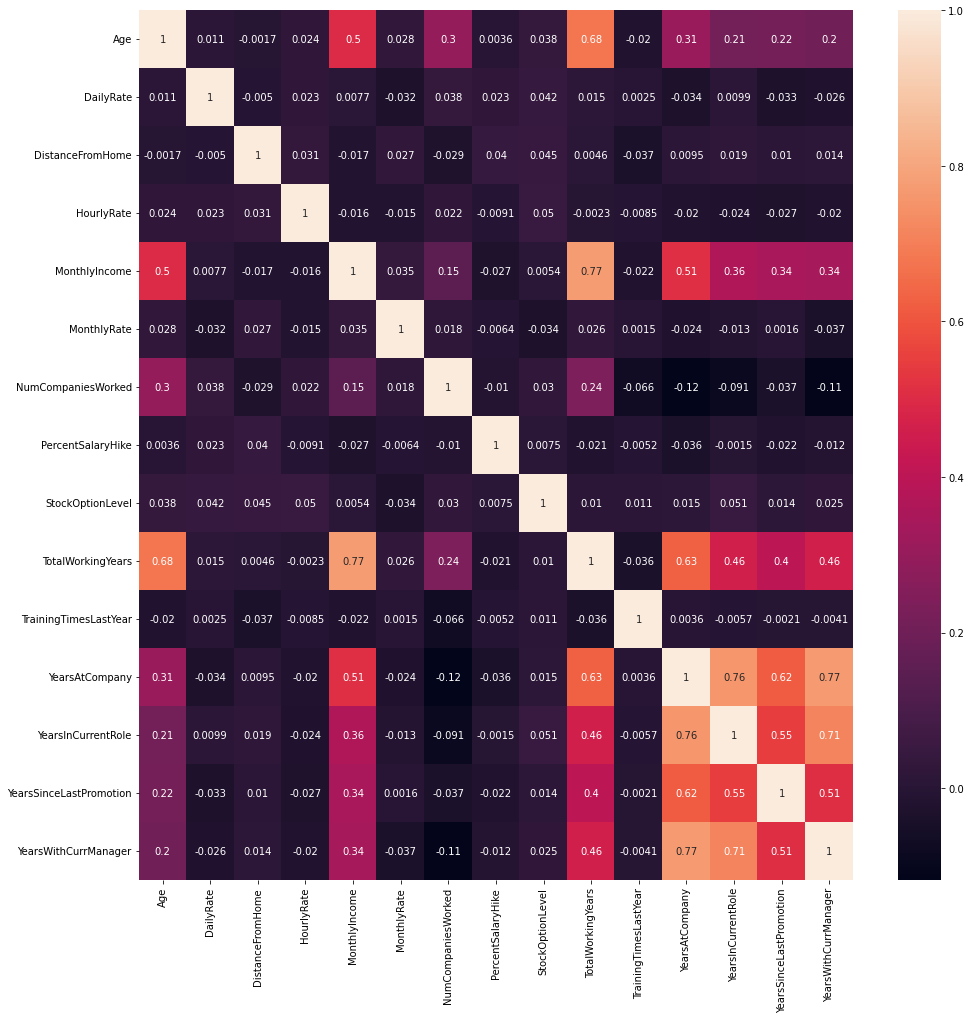

In [48]:
# Get the correlation between the numerical variables
correlation = num_attributes.corr(method='pearson')

# Plot the heatmap
fig, ax = plt.subplots() #Use the variable ax for single a Axes
ax.figure.set_size_inches(16, 16) #Set the figure size
sns.heatmap(correlation, annot=True) #Obtain plot
plt.show()

5.4.2 For Categorical Variables:

In [49]:
# Define function: cramér V
def cramer_v(var_x, var_y):
    confusion_matrix = pd.crosstab(var_x, var_y).values # build contigency matrix (or confusion matrix
    n = confusion_matrix.sum() # Get the sum of all values in the matrix
    r, k = confusion_matrix.shape #Get the rows, cols
    chi2 = chi2_contingency(confusion_matrix)[0] #Get the chi-squared
    # Make the bias correction
    chi2corr = max(0, chi2 - (k-1) * (r-1) / (n-1))
    kcorr = k - (k-1) ** 2 / (n-1)
    rcorr = r - (r-1) ** 2 / (n-1)
    return np.sqrt((chi2corr/n) / min(kcorr-1, rcorr-1)) # Return cramér V

# List all the possible combinations between categorical variables
a1 = cramer_v(cat_attributes['JobRole'], cat_attributes['JobRole'])
a2 = cramer_v(cat_attributes['JobRole'], cat_attributes['Department'])
a3 = cramer_v(cat_attributes['JobRole'], cat_attributes['BusinessTravel'])

a4 = cramer_v(cat_attributes['Department'], cat_attributes['JobRole'])
a5 = cramer_v(cat_attributes['Department'], cat_attributes['Department'])
a6 = cramer_v(cat_attributes['Department'], cat_attributes['BusinessTravel'])

a7 = cramer_v(cat_attributes['OverTime'], cat_attributes['JobRole'])
a8 = cramer_v(cat_attributes['OverTime'], cat_attributes['Department'])
a9 = cramer_v(cat_attributes['OverTime'], cat_attributes['BusinessTravel'])

# Build the dataset to make the correlations
d = pd.DataFrame({'JobRole': [a1, a2, a3],
                  'Department': [a4, a5, a6],
                  'BusinessTravel': [a7, a8, a9]
                 })
d = d.set_index(d.columns) #Set index equal to columns
print(d)

                 JobRole  Department  BusinessTravel
JobRole         1.002732    0.940031        0.066840
Department      0.940031    1.000681        0.007924
BusinessTravel  0.063869    0.008236        0.044065


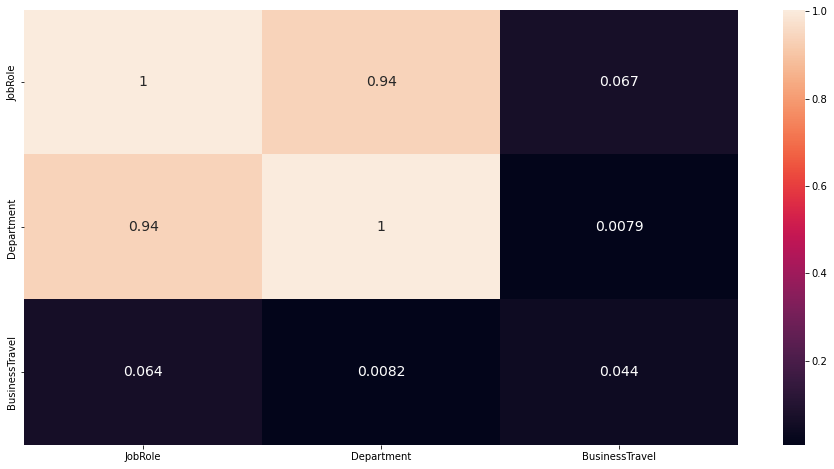

In [50]:
# Plot the heatmap
fig, ax = plt.subplots()
ax.figure.set_size_inches(16, 8)
sns.heatmap(d, annot=True, annot_kws={"fontsize":14})
plt.show()

**Comment**: As observed, there is a strong positive correlation between 'Department' and 'JobRole'.

### **6.0 Data Preprocessing** ###

#### 6.1 Normalization ####

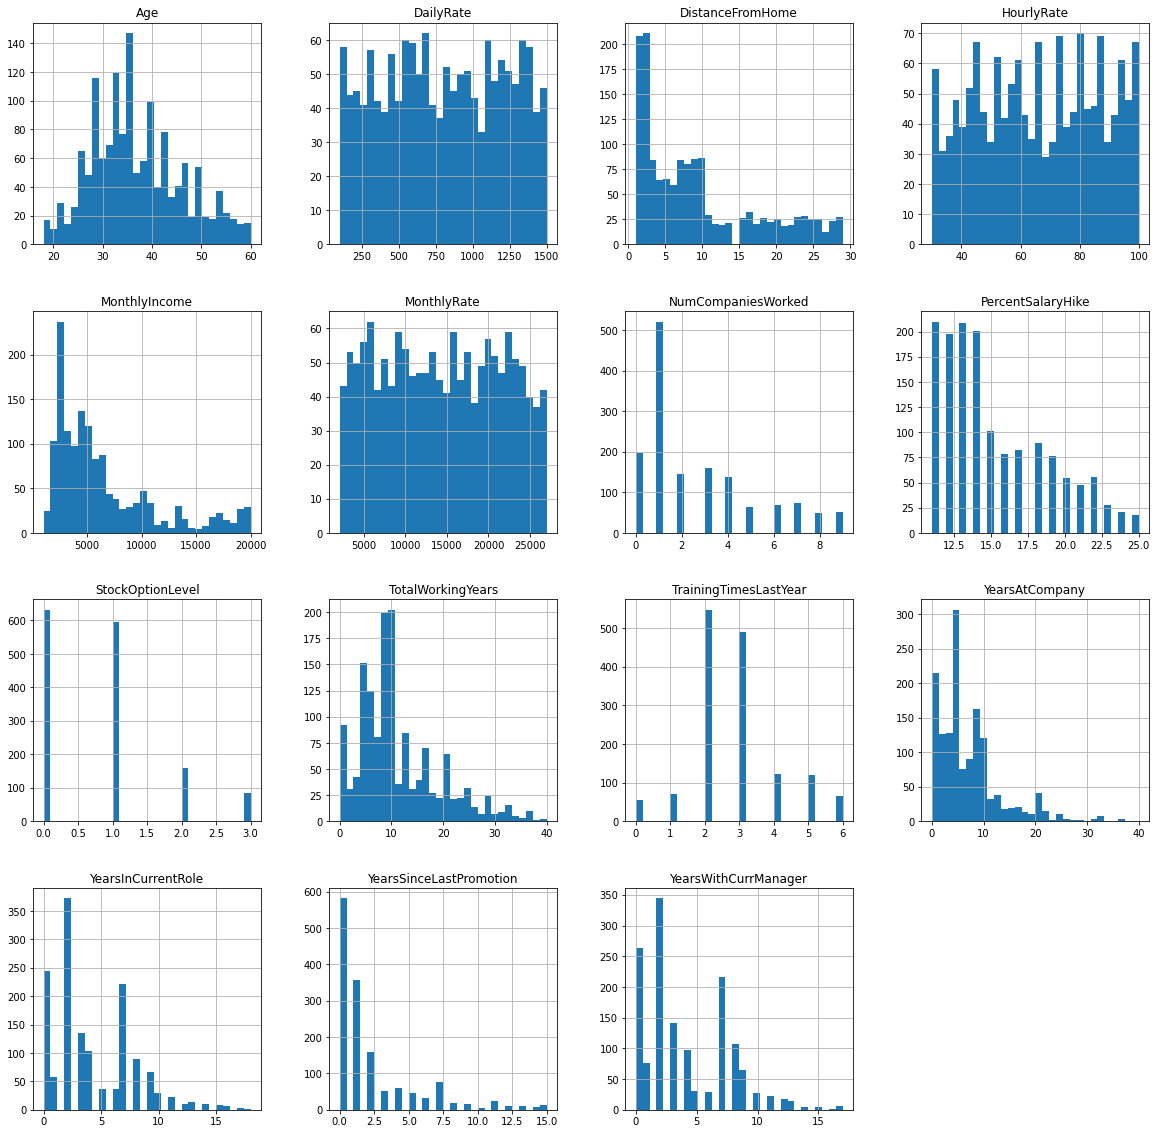

In [51]:
# Plot a histogram for all numerical attributes
num_histogram = num_attributes.hist(bins=30, figsize=(20,20))

**Comment**: As indicated by the above histograms, almost all variables didn't have a normal distribution, not even nearly normal (except age). So, it is preferred to leave as it is than to risk a erroneous normalization.

#### 6.2 Scaling ####

In [137]:
# Scaling the numerical variables
mms = MinMaxScaler()
scaled_num_attributes = mms.fit_transform(num_attributes)

# Create the DataFrame
df_scaled_num_attributes = pd.DataFrame(scaled_num_attributes)

# Renaming the columns
df_scaled_num_attributes.columns = num_attributes.columns
df_scaled_num_attributes.sample()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
163,0.928571,0.16607,0.821429,0.757143,0.443918,0.855571,0.333333,0.357143,0.333333,0.3,0.333333,0.125,0.166667,0.066667,0.235294


In [138]:
# saves the rescaling
pickle.dump(mms, open('numerical_vars_scaler.pkl', 'wb'))

#### 6.3 Transformation####

In [53]:
# Obtain the target var
target_var = df_employee[['Attrition']]

# Obtain only binary attributes
binary_attributes = df_employee[['OverTime', 'Gender']]

# Drop the target var and binary attribute from categorical variables
cat_attributes.drop(['Attrition','OverTime', 'Gender'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


6.3.1 Encoding Binary Attributes and Target

In [54]:
# Create an empty DataFrame
df_binary_att_encoded = pd.DataFrame()

# Encode over_time
df_binary_att_encoded['OverTime'] = binary_attributes['OverTime'].apply(lambda x: 1 if x == 'Yes' 
                                                                          else 0)

# encondes gender
df_binary_att_encoded['Gender'] = binary_attributes['Gender'].apply(lambda x: 1 if x == 'Male'
                                                                    else 0)

# encondes target_var attrition
target_var['Attrition'] = target_var['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


6.3.2 Frequency Encoding Categorical Attributes

As the categorical attributes have many unique values, using one-hot encode them might increase the dataset dimension too much. Thus, we applied frequency encoding to avoid such situation.

In [55]:
# Define the frequency encoding function
def get_attribute_frequency(attribute):
    count_dict_attribute = attribute.value_counts().to_dict() #Create a dictionary from value counts
    df_count_attribute = pd.DataFrame(count_dict_attribute.items(), columns=['Value','Count']) #Store values as DataFrame
    df_count_attribute['frequency'] = df_count_attribute['Count'] / df_count_attribute['Count'].sum()  #Calculate the frequency for each value
    frequency_attribute = df_count_attribute.set_index('Value').to_dict()['frequency'] #Get a dictionary for the frequency
    return frequency_attribute

def get_encoded_frequencies(data_frame):
    encoded_freq = pd.DataFrame() #Create an empty DataFrame
    # Create the columns for frequency
    for column in data_frame.columns:
        encoded_freq[column] = data_frame[column].map(get_attribute_frequency(data_frame[column]))  
    return encoded_freq

# Reset the index
cat_attributes.reset_index(drop=True, inplace=True)

# Frequency encodes categorical vars
cat_attr_freq_encoded = get_encoded_frequencies(cat_attributes)

#### 6.4 Joining ####

In [56]:
# joins scaled with encoded attributes
df_employee_prep = pd.concat([target_var, df_scaled_num_attributes, df_binary_att_encoded, cat_attr_freq_encoded], axis=1)
df_employee_prep.to_csv('EmployeeAttrition_prep.csv', index=False) #Save the file

In [57]:
df_employee_prep['BusinessTravel']

0       0.709524
1       0.188435
2       0.709524
3       0.188435
4       0.709524
          ...   
1465    0.188435
1466    0.709524
1467    0.709524
1468    0.188435
1469    0.709524
Name: BusinessTravel, Length: 1470, dtype: float64

### 7.0 Machine Learning Modelling ###

In [58]:
# Split the dataset into training and testing set

# Create arrays for the features and target variable
X = df_employee_prep.drop('Attrition', axis=1).copy()
y = df_employee_prep['Attrition'].copy()

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
# Balance the training data using SMOTE

# Count the number of classes before oversampling
counter = Counter(y_train)
print('Before balancing:', counter)

# Define the resampler
resampler = SMOTETomek(random_state=42, n_jobs=-1)

# Transforms the dataset
X_balanced, y_balanced = resampler.fit_resample(X_train, y_train)

# Count the number of classes after oversampling
counter = Counter(y_balanced)
print('After balancing:', counter)

Before balancing: Counter({0: 986, 1: 190})
After balancing: Counter({0: 986, 1: 986})


#### 7.1 Model Training and Performance Metrics ####

In [60]:
class GeneralUtils(object):

    def __init__(self):
        pass

    def test_package(self):
        print("Hello! This is a test!")

    def set_pandas_options(self):
        # disable max columns limit
        pd.set_option('display.max_columns', None)

        # sets to not crop long vlaues for rows
        pd.set_option("display.max_colwidth", None)

        # sets format to suppress scientific notation
        pd.options.display.float_format = '{:,.6f}'.format

    def get_descriptive_statistics(self, data_set):
        # central tendency: mean, median
        mean = pd.DataFrame(data_set.apply(np.mean)).T
        median = pd.DataFrame(data_set.apply(np.median)).T

        # distribution: std, min, max, range, skew, kurtosis
        std = pd.DataFrame(data_set.apply(np.std)).T
        min_value = pd.DataFrame(data_set.apply(min)).T
        max_value = pd.DataFrame(data_set.apply(max)).T
        range_value = pd.DataFrame(
            data_set.apply(lambda x: x.max() - x.min())).T
        skewness = pd.DataFrame(data_set.apply(lambda x: x.skew())).T
        kurtosis = pd.DataFrame(data_set.apply(lambda x: x.kurtosis())).T

        # concatenates
        summary_stats = pd.concat(
            [min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
        summary_stats.columns = ['attributes', 'min', 'max',
                                 'range', 'mean', 'median',
                                 'std', 'skewness', 'kurtosis']

        return summary_stats

    def cramer_v(self, var_x, var_y):
        # builds contigency matrix (or confusion matrix)
        confusion_matrix_v = pd.crosstab(var_x, var_y).values

        # gets the sum of all values in the matrix
        n = confusion_matrix_v.sum()

        # gets the rows, cols
        r, k = confusion_matrix_v.shape

        # gets the chi-squared
        chi2 = chi2_contingency(confusion_matrix_v)[0]

        # makes the bias correction
        chi2corr = max(0, chi2 - (k-1) * (r-1) / (n-1))
        kcorr = k - (k-1) ** 2 / (n-1)
        rcorr = r - (r-1) ** 2 / (n-1)

        # returns cramér V
        return np.sqrt((chi2corr/n) / min(kcorr-1, rcorr-1))

    def theils_u(self, x, y):
        s_xy = drv.entropy_conditional(x, y)
        x_counter = Counter(x)
        total_occurrences = sum(x_counter.values())
        p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
        s_x = drv.entropy(p_x)

        if s_x == 0:
            return 1

        else:
            return (s_x - s_xy) / s_x

    def get_cramer_list(self, df_cat_attributes):

        # gets the cols names
        cat_cols = df_cat_attributes.columns

        # makes the permutations between cols
        pairs = list(permutations(cat_cols, 2))

        # creates auxiliar vars to be used as index
        a = 0
        b = a + 1
        c = b + 1

        # creates an aux list
        list_aux = []

        # calculate the number of turns to be looped
        turns = len(pairs) / len(cat_cols) + 1
        turns = np.arange(turns)

        # loops to build a list that stores pairs lists
        for turn in turns:
            list_aux.append([pairs[a], pairs[b], pairs[c]])
            a += len(turns) - 1
            b = a + 1
            c = b + 1

        # creates an empty list
        list_array = []

        # creates a list of arrays that store the pair including the pair (col_a, col_a)
        for element in np.arange(len(list_aux)):
            list_array.append(np.append(list_aux[element], [
                [cat_cols[element], cat_cols[element]]], axis=0))

        # creates empty list
        cramer_list = []

        for element in list_array:
            # this list will store the calculated values for a set o permutations
            values_list = []

            # makes the cramer_v calculations and store the result in the list
            for pair in element:
                values_list.append(cramer_v(
                    df_cat_attributes[pair[0]], df_cat_attributes[pair[1]]))

            # populates the cramer_list with the calculated cramer_v for each set of permutations
            cramer_list.append(values_list)

        # moves the elements inside each list in cramer_list to their respective index positions
        for values_list in cramer_list:
            elem_to_move = values_list[-1]
            values_list.insert(cramer_list.index(values_list), elem_to_move)
            values_list.pop(-1)

        return cramer_list

    def get_theils_u_list(self, df_cat_attributes):

        # gets the cols names
        cat_cols = df_cat_attributes.columns

        # makes the permutations between cols
        pairs = list(permutations(cat_cols, 2))

        # creates auxiliar vars to be used as index
        a = 0
        b = a + 1
        c = b + 1

        # creates an aux list
        list_aux = []

        # calculate the number of turns to be looped
        turns = len(pairs) / len(cat_cols) + 1
        turns = np.arange(turns)

        # loops to build a list that stores pairs lists
        for turn in turns:
            list_aux.append([pairs[a], pairs[b], pairs[c]])
            a += len(turns) - 1
            b = a + 1
            c = b + 1

        # creates an empty list
        list_array = []

        # creates a list of arrays that store the pair including the pair (col_a, col_a)
        for element in np.arange(len(list_aux)):
            list_array.append(np.append(list_aux[element], [
                [cat_cols[element], cat_cols[element]]], axis=0))

        # creates empty list
        theils_u_list = []

        for element in list_array:
            # this list will store the calculated values for a set o permutations
            values_list = []

            # makes the theils_u calculations and store the result in the list
            for pair in element:
                values_list.append(theils_u(
                    df_cat_attributes[pair[0]], df_cat_attributes[pair[1]]))

            # populates the theils_u_list with the calculated theils_u for each set of permutations
            theils_u_list.append(values_list)

        # moves the elements inside each list in theils_u_list to their respective index positions
        for values_list in theils_u_list:
            elem_to_move = values_list[-1]
            values_list.insert(theils_u_list.index(values_list), elem_to_move)
            values_list.pop(-1)

        return theils_u_list

    def get_attribute_frequency(self, attribute):

        # creates a dictionary from value counts
        count_dict_attribute = attribute.value_counts().to_dict()

        # stores values as DataFrame
        df_count_attribute = pd.DataFrame(count_dict_attribute.items(), columns=['Value', 'Count'])

        # calculates the frequency for each value
        df_count_attribute['frequency'] = df_count_attribute['Count'] / df_count_attribute['Count'].sum()

        # gets a dictionary for the frequency
        frequency_attribute = df_count_attribute.set_index('Value').to_dict()['frequency']

        return frequency_attribute

    def get_encoded_frequencies(self, data_frame):

        # creates an empty DataFrame
        encoded_freq = pd.DataFrame()

        # creates columns for frequency
        for column in data_frame.columns:
            encoded_freq[column] = data_frame[column].map(self.get_attribute_frequency(data_frame[column]))

        return encoded_freq

    def get_classifiers_performance(self, X_train, X_test, y_train, y_test, threshold, classifiers):

        # creates empty data frame
        df_performance = pd.DataFrame()

        for clf in classifiers:
            print("Training " + type(clf).__name__ + "...")
            # fits the classifier to training data
            clf.fit(X_train, y_train)

            # predict the probabilities
            clf_probs = clf.predict_proba(X_test)

            # calculates model metrics
            clf_accuracy, clf_kappa, clf_f1, clf_auc, clf_precision, clf_recall = self.calculate_model_metrics(clf,
                                                                                                               X_test, y_test,
                                                                                                               clf_probs, threshold)

            # creates a dict
            clf_dict = {
                'model': [type(clf).__name__, '---'],
                'precision': [clf_precision, np.nan],
                'recall': [clf_recall, np.nan],
                'f1-Score': [clf_f1, np.nan],
                'ROC AUC': [clf_auc, np.nan],
                'accuracy': [clf_accuracy, np.nan],
                'cohen kappa': [clf_kappa, np.nan]}

            # concatenate Data Frames
            df_performance = pd.concat([df_performance, pd.DataFrame(clf_dict)])

        # resets Data Frame index
        df_performance = df_performance.reset_index()

        # drops index
        df_performance.drop('index', axis=1, inplace=True)

        # gets only the odd numbered rows
        rows_to_drop = np.arange(1, len(classifiers)*2, 2)

        # drops unwanted rows that have no data
        df_performance.drop(rows_to_drop, inplace=True)

        # returns performance summary
        return df_performance

    def calculate_model_metrics(self, model, X_test, y_test, model_probs, threshold):
        """
            Calculates Accuracy, F1-Score, PR AUC
        """
        # keeps probabilities for the positive outcome only
        probs = pd.DataFrame(model_probs[:, 1], columns=['prob'])

        # applies the threshold
        y_pred = probs['prob'].apply(lambda x: 1 if x > threshold else 0)

        # calculates f1-score
        f1 = f1_score(y_test, y_pred)

        # calculates accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # calculates kappa score
        kappa = cohen_kappa_score(y_test, y_pred)

        # calculates AUC
        auc_score = roc_auc_score(y_test, probs)

        # calculates the precision
        precision = precision_score(y_test, y_pred)

        # calculates the recall
        recall = recall_score(y_test, y_pred)

        return accuracy, kappa, f1, auc_score, precision, recall


    def plot_pr_curves(self, X_test, y_test, classifiers):
        # define subplots
        fig, ax = plt.subplots(figsize=(15, 10))

        for clf in classifiers:
            # predict probabilities
            clf_probs = clf.predict_proba(X_test)

            # keep probabilities for the positive outcome only
            probs = clf_probs[:, 1]

            # calculate precision and recall for each threshold
            precision, recall, _ = precision_recall_curve(y_test, probs)

            # plots the curve
            plt.plot(recall, precision, marker='.', label=type(clf).__name__)

        # calculates the no-skill baseline
        no_skill = len(y_test[y_test == 1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill],
                 linestyle='--', label='No Skill')

        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')

        # title
        plt.title('PR Curves', fontsize=14)

        # adjusts subplot
        plt.tight_layout()

        # show the legend
        plt.legend()

        # displays the plot
        plt.show()

    def plot_single_confusion_matrix(self, y_test, y_pred, model, qualifier=""):
        # calculates confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # plots confusion matrix as heatmap
        ax = sns.heatmap(cm, annot=True, fmt='g', cmap='viridis',
                         square=True, annot_kws={"size": 14})

        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        ax.title.set_text(type(model).__name__ + ' ' + str(qualifier))

    def plot_multiple_confusion_matrices(self, n_rows, n_cols, X_test, y_test, classifiers, threshold):
        # define subplots
        fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

        for clf, ax, n in zip(classifiers, ax.flatten(), list(range(n_rows*n_cols))):

            # predict the probabilities
            clf_probs = clf.predict_proba(X_test)

            # keeps probabilities for the positive outcome only
            probs = pd.DataFrame(clf_probs[:, 1], columns=['prob_default'])

            # applied the threshold
            y_pred = probs['prob_default'].apply(
                lambda x: 1 if x > threshold else 0)

            # plots confusion matrix as heatmap
            plt.subplot(n_rows, n_cols, n+1)
            self.plot_single_confusion_matrix(y_test, y_pred, clf)

        # adjusts subplot
        plt.tight_layout()

        # displays the plot
        plt.show()

    def plot_calibration_curve(self, model, y_test, model_probs, n_bins):

        # calculates the calibration curve - XGBoost Best
        frac_of_pos, mean_pred_val = calibration_curve(
            y_test, model_probs[:, 1], n_bins=n_bins, normalize=True)

        # sets plot size
        plt.figure(figsize=(8, 6))

        # plots y = x; perfect calibrated
        plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')

        # plots the curve
        plt.plot(mean_pred_val, frac_of_pos, 's-', label=type(model).__name__)

        # sets plot features
        plt.ylabel('Fraction of positives')
        plt.xlabel('Average Predicted Probability')
        plt.title('Calibration Curve')
        plt.legend()

    def plot_multiple_calibration_curves(self, models, y_test, models_probs, n_bins):

        # sets plot size
        plt.figure(figsize=(8, 6))

        # plots y = x; perfect calibrated
        plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')

        # plots calibration curve for each model
        for model, model_probs in zip(models, models_probs):

            # calculates the calibration curve
            frac_of_pos, mean_pred_val = calibration_curve(
                y_test, model_probs[:, 1], n_bins=n_bins, normalize=True)

            # plots the curve
            plt.plot(mean_pred_val, frac_of_pos,
                     's-', label=type(model).__name__)

            # sets plot features
            plt.ylabel('Fraction of positives')
            plt.xlabel('Average Predicted Probability')
            plt.title('Calibration Curve')
            plt.legend()

    def ecdf(self, data):
        """Compute ECDF for a one-dimensional array of measurements."""
        # Number of data points: n
        n = len(data)

        # x-data for the ECDF: x
        x = np.sort(data)

        # y-data for the ECDF: y
        y = np.arange(1, n+1) / n

        return x, y

In [61]:
# Set the threshold
THRESHOLD = 0.50

# Define the classifiers
classifiers = [LogisticRegression(random_state=42),
               RandomForestClassifier(random_state=42),
               XGBClassifier(random_state=42), 
               LGBMClassifier(random_state=42, n_jobs=-1)]

# Create a GeneralUtils object
gu = GeneralUtils()

# Calculate classifiers performance
df_performance = gu.get_classifiers_performance(X_balanced, X_test, 
                                                np.ravel(y_balanced), np.ravel(y_test), 
                                                THRESHOLD, classifiers)
df_performance

Training LogisticRegression...
Training RandomForestClassifier...
Training XGBClassifier...
Training LGBMClassifier...


,model,precision,recall,f1-Score,ROC AUC,accuracy,cohen kappa
0,LogisticRegression,0.323810,0.723404,0.447368,0.777156,0.714286,0.290712
2,RandomForestClassifier,0.400000,0.170213,0.238806,0.768628,0.826531,0.158491
4,XGBClassifier,0.571429,0.255319,0.352941,0.786114,0.850340,0.282051
6,LGBMClassifier,0.842105,0.340426,0.484848,0.806013,0.884354,0.432626


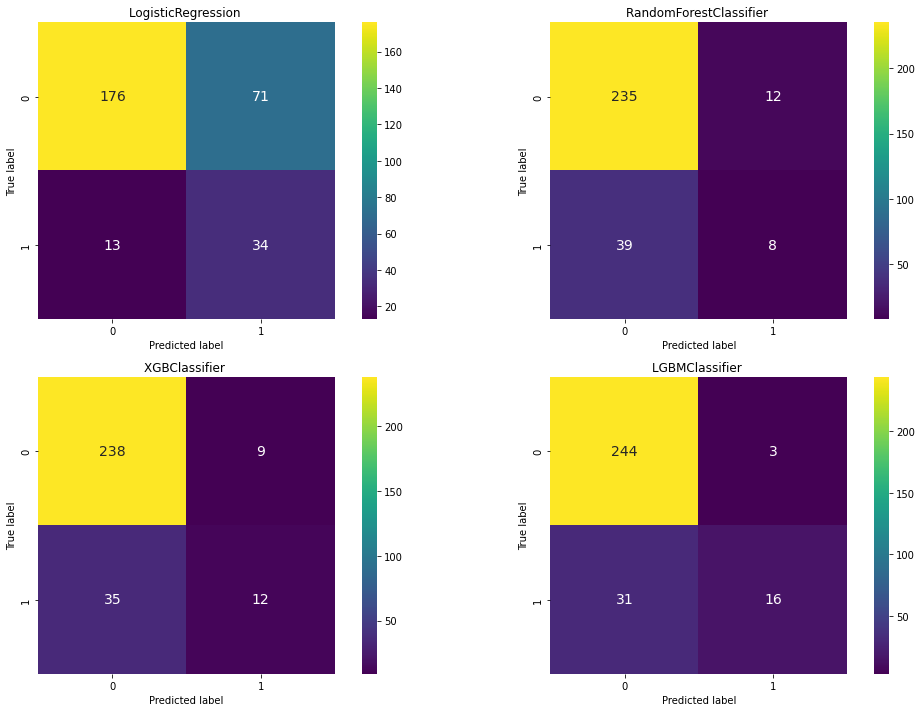

In [62]:
# Obtain the confusion metrics for the chosen models
gu.plot_multiple_confusion_matrices(2, 2, X_test, y_test, classifiers, THRESHOLD)

**Comment**: As mentioned in the Problem Statement, the approriate model should be chosen with the minimized FN and maximum TP to fulfill the business metrics. In this case, 'LogisticRegression' would be the most suitable algorithm since it provided the lowest FN. Although it has the highest FP, it's not a bad idea to check on these employees in our case.

#### 7.2 Probability Distribution ####

As 'LogisticRegression' gives us the lowest FN and 'LGBMClassifier' gives us the lowest FP, let's check their probabilities distribution to see how the algorithms behave.

In [64]:
# Instantiate the classifiers
lr_clf = LogisticRegression(random_state=42)
lgbm_clf = LGBMClassifier(random_state=42, n_jobs=-1)

# Train the classifiers
lr_clf.fit(X_balanced, y_balanced)
lgbm_clf.fit(X_balanced, y_balanced)

# Store the predicted probabilities for class 1
y_pred_lr_prob = lr_clf.predict_proba(X_test)[:, 1]
y_pred_lgbm_prob = lgbm_clf.predict_proba(X_test)[:, 1]

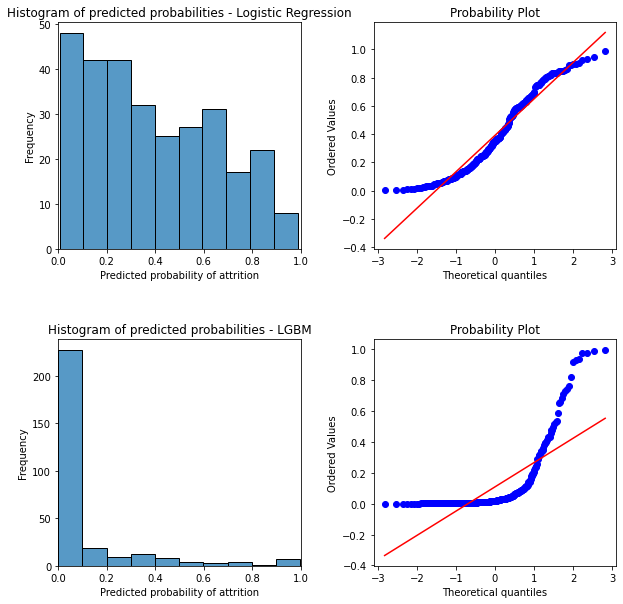

In [65]:
# Plot the graphs
fig, ax = plt.subplots() #Set axes
ax.figure.set_size_inches(10, 10) #Set figure size

# Plot histogram for Logistic Regression
plt.subplot(2, 2, 1)
ax = sns.histplot(y_pred_lr_prob, bins=10)
plt.xlim(0,1) # x-axis limit from 0 to 1
plt.title('Histogram of predicted probabilities - Logistic Regression')
plt.xlabel('Predicted probability of attrition')
plt.ylabel('Frequency')

# Plot probability for Logistic Regression
plt.subplot(2, 2, 2)
ax = stats.probplot(y_pred_lr_prob, plot=plt)

# Plot histogram for LGBM
plt.subplot(2, 2, 3)
ax = sns.histplot(y_pred_lgbm_prob, bins=10)
plt.xlim(0,1) # x-axis limit from 0 to 1
plt.title('Histogram of predicted probabilities - LGBM')
plt.xlabel('Predicted probability of attrition')
plt.ylabel('Frequency')

# Plot probability for LGBM
plt.subplot(2, 2, 4)
ax = stats.probplot(y_pred_lgbm_prob, plot=plt)

plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.4)
plt.show()

For the context and challenge of our project, the LogisticRegression suits better than LGBMClassifier. Based on the above histogram, it could be concluded that LGBMClassifier is more optimistic, where it predicts more values that are closer to 0.0 than values closer to 1.0.

Furthermore, the Probability Plot for LogisticRegression showed that the points were well distributed, forming a smooth S-shaped curve and the red diagonal seems to form a 45 angle with the X-axis. By contrast, the LGBMClassifier had the most of the points gathered to the left of the curve, the points form a Z-shaped curve and the red diagonal does not seem to form a 45 angle with the X-axis.

The above finds further supported our previous decison to proceed the project with LogisticRegression as the classifier.

#### 7.3 Classification Report ####

The classification report could be another approach to determine the suitable algorithm to use. In this project, we aim to obtain a high recall rate for class 1. 

In [66]:
# makes predictions
y_pred_lr = lr_clf.predict(X_test)
y_pred_lgbm = lgbm_clf.predict(X_test)

print('Classification Report for ' + type(lr_clf).__name__)
print(classification_report(y_test, y_pred_lr))

print('\nClassification Report for ' + type(lgbm_clf).__name__)
print(classification_report(y_test, y_pred_lgbm))

Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.93      0.71      0.81       247
           1       0.32      0.72      0.45        47

    accuracy                           0.71       294
   macro avg       0.63      0.72      0.63       294
weighted avg       0.83      0.71      0.75       294


Classification Report for LGBMClassifier
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       247
           1       0.84      0.34      0.48        47

    accuracy                           0.88       294
   macro avg       0.86      0.66      0.71       294
weighted avg       0.88      0.88      0.86       294



**Comment**: The high recall rate of class 1 for LogisticRegression supported our choice of algorithm for this project.

### **8.0 Tuning the Best Model (Logistic Regression)** ###

#### 8.1 Hyperparameter Tuning ###

In [82]:
# Instantiate classifier
lr_clf = LogisticRegression(random_state=42, n_jobs=-1)

# Set up space dictionary with specified hyperparameters
space = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
         {'penalty':['none', 'elasticnet', 'l1', 'l2']},
         {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

# Randomized Search on Hyperparameter
lr_clf_cv = GridSearchCV(estimator=lr_clf, param_grid=space, scoring='recall', cv=10, verbose=2, n_jobs=-1)

# Fit the RandomizedSearchCV object
lr_clf_cv.fit(X_balanced, y_balanced)

In [86]:
# Obtain the best estimator
lr_best_model = lr_clf_cv.best_estimator_
print("\nBest Model: {}".format(lr_best_model))

# Print the tuned parameters and score
print("\nTuned Parameters: {}".format(lr_clf_cv.best_params_)) 
print("\nBest score: {:.3f}".format(lr_clf_cv.best_score_))


Best Model: LogisticRegression(n_jobs=-1, random_state=42, solver='newton-cg')

Tuned Parameters: {'solver': 'newton-cg'}

Best score: 0.788


#### 8.2 Best Model Prediction

In [91]:
# Model Predictions
y_test_pred = lr_best_model.predict(X_test)

# Predict the probability
lr_best_model_probs = lr_best_model.predict_proba(X_test)

#### 8.3 Performance Metrics for the Best Model 

In [93]:
# Set the threshold
THRESHOLD = 0.50

# Calculate classifier performance
df_performance = gu.get_classifiers_performance(X_balanced, X_test, 
                                                np.ravel(y_balanced), np.ravel(y_test), 
                                                THRESHOLD, [lr_best_model])
df_performance

Training LogisticRegression...


,model,precision,recall,f1-Score,ROC AUC,accuracy,cohen kappa
0,LogisticRegression,0.32381,0.723404,0.447368,0.777156,0.714286,0.290712


As we are dealing with imbalanced data set, the most relevant metric is the recall (0.723404) which is used when the False Negatives are crucial. In this case, False Negatives are crucial, since losing these people could lead to company financial loss.

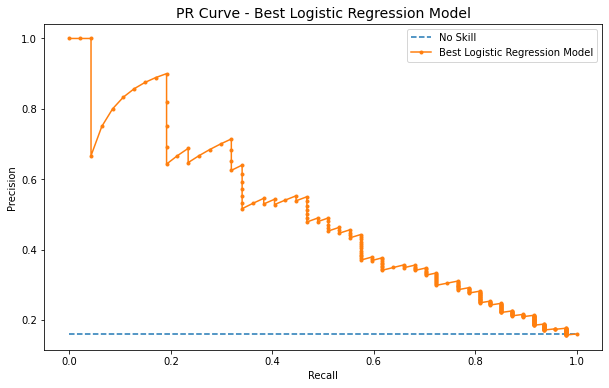

In [97]:
# Precision-Recall Curve
fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 6)
gu.plot_pr_auc(y_test, lr_best_model_probs, 'Best Logistic Regression Model') #Call function to plot PR AUC

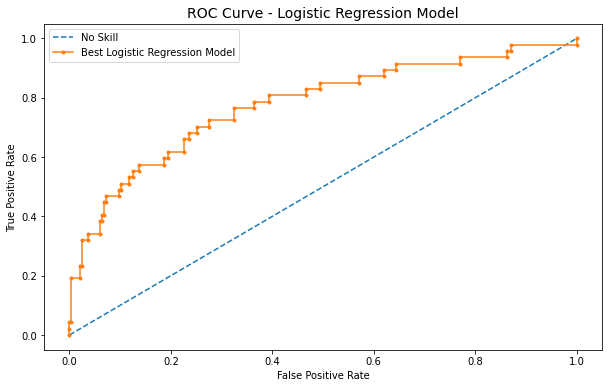

In [99]:
# ROC Curve
plt.figure(figsize=(10,6)) #Set figure size
ns_probs = [0 for _ in range(len(y_test))] #Generate a no-skill prediction (majority class)

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
fpr, tpr, _ = roc_curve(y_test, lr_best_model_probs[:,1])

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Best Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model', fontsize=14) #Title
plt.legend() #Legend
plt.show()

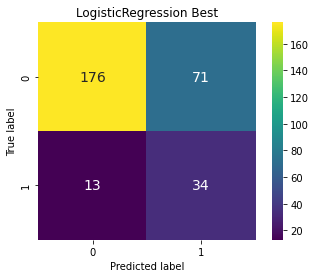

In [101]:
# Confusion Matrix
df_lr_bm_probs = pd.DataFrame(lr_best_model_probs[:, 1], columns = ['prob_default']) #Keep probabilities for Class 1
y_pred_bm = df_lr_bm_probs['prob_default'].apply(lambda x: 1 if x > THRESHOLD else 0) #Apply the threshold
gu.plot_single_confusion_matrix(y_test, y_pred_bm, lr_best_model, 'Best') #Obtain confusion matrix
plt.show()

**Comment**: As observed, we were able to minimize the number of FN cases while keeping the FP to its minimum possible.

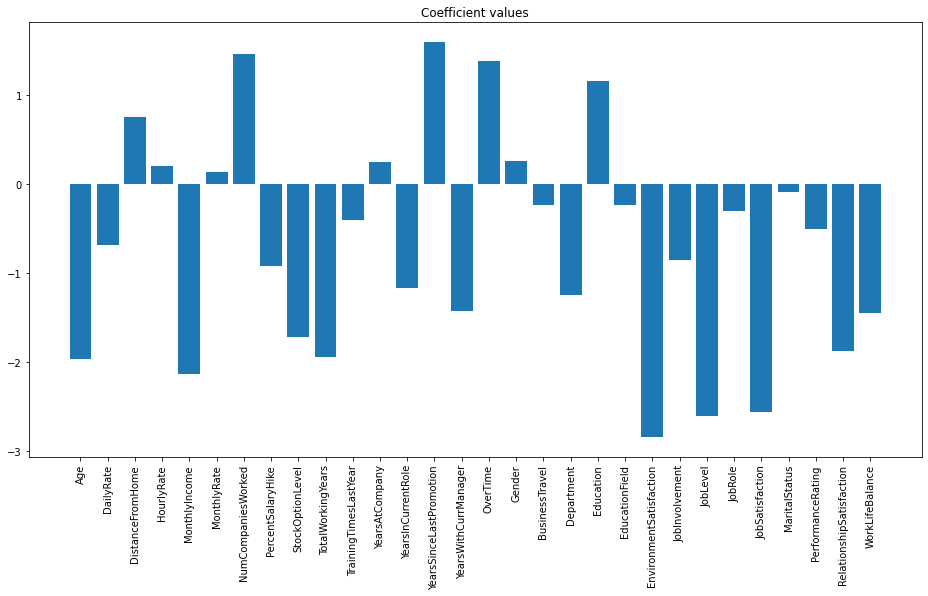

In [129]:
# Coef value / slope
m = lr_best_model.coef_

# Intercept
b = lr_best_model.intercept_

# Plot coefficient values
plt.figure(figsize=(16, 8))
plt.title("Coefficient values")
plt.bar(range(X.shape[1]), m[0])
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.show()

**Comment**: Based on the coefficient plot, 'EnvironmentSatisfaction' contributed the most to the model.

In [105]:
# Concat the testing results
df_X_test = pd.DataFrame(X_test)
df_y_test = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(y_test_pred)
df_y_test.columns = ['y_test']
df_y_pred.columns = ['y_pred']
df_test_final = pd.concat([df_y_pred, df_y_test, df_X_test], axis=1)

# Show false negatives or true postives
df_fn_tp = df_test_final[((df_test_final['y_pred'] == 0) & (df_test_final['y_test'] == 1)) | ((df_test_final['y_pred'] == 1) & (df_test_final['y_test'] == 1))]
df_fn_tp

,y_pred,y_test,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
2,1.0,1.0,0.452381,0.909807,0.035714,0.885714,0.056925,0.012126,0.666667,0.285714,...,0.055782,0.303401,0.255102,0.369388,0.176190,0.300680,0.319728,0.846259,0.206122,0.607483
24,0.0,1.0,0.380952,0.427344,0.178571,0.757143,0.102738,0.602610,0.222222,0.000000,...,0.315646,0.195238,0.590476,0.369388,0.198639,0.196599,0.319728,0.846259,0.312245,0.607483
36,0.0,1.0,0.761905,0.549034,0.071429,0.800000,0.088152,0.068902,0.111111,0.214286,...,0.108163,0.193197,0.255102,0.369388,0.056463,0.300680,0.457823,0.846259,0.312245,0.607483
45,0.0,1.0,0.547619,0.900501,0.392857,0.271429,0.976093,0.569604,0.111111,0.071429,...,0.089796,0.195238,0.590476,0.046939,0.054422,0.300680,0.457823,0.846259,0.293878,0.607483
69,0.0,1.0,0.428571,0.154617,0.285714,0.700000,0.125276,0.790323,0.000000,0.428571,...,0.315646,0.303401,0.255102,0.369388,0.198639,0.300680,0.457823,0.846259,0.187755,0.234014
122,0.0,1.0,0.904762,0.242663,0.464286,0.600000,0.208215,0.097009,1.000000,0.500000,...,0.412245,0.195238,0.590476,0.369388,0.198639,0.190476,0.457823,0.846259,0.187755,0.607483
126,1.0,1.0,0.952381,0.032212,0.785714,0.914286,0.489889,0.055049,0.111111,0.071429,...,0.315646,0.303401,0.590476,0.148299,0.089116,0.312245,0.457823,0.846259,0.293878,0.234014
132,1.0,1.0,0.309524,0.314961,0.678571,0.585714,0.186940,0.911223,0.333333,0.000000,...,0.412245,0.195238,0.056463,0.363265,0.221769,0.300680,0.457823,0.846259,0.312245,0.607483
136,1.0,1.0,0.785714,0.750179,0.250000,0.328571,0.507688,0.925758,0.222222,0.285714,...,0.412245,0.193197,0.056463,0.148299,0.098639,0.312245,0.319728,0.846259,0.293878,0.607483
182,0.0,1.0,0.547619,0.897638,0.678571,0.571429,0.112217,0.788356,0.111111,0.785714,...,0.108163,0.195238,0.590476,0.369388,0.056463,0.190476,0.319728,0.153741,0.293878,0.234014


### **9.0 Best Model Validation/Verification** ###

To check/verify the overall performance of the chosen best model,the cross-validation scoring with cross_val_score() should be utilized.

In [102]:
# Check the balance of whole dataset
print(f'Ratio of negatives in full data set: {y.value_counts(normalize=True).to_dict()[0]}')
print(f'Ratio of positives in full data set: {y.value_counts(normalize=True).to_dict()[1]}')

Ratio of negatives in full data set: 0.8387755102040816
Ratio of positives in full data set: 0.16122448979591836


The above results indicated that the original full data set was imbalanced. Thus, the StratifiedKFold was adopted as K-folding strategy for the cross validation.

In [103]:
# Calculate the cross validation scores
cv_scores = cross_val_score(lr_best_model, X, np.ravel(y), cv = StratifiedKFold(n_splits=10), scoring='precision', n_jobs=-1)

# Calculate the average accuracy and standard deviation of the scores
print("Average precision: %0.4f (+/- %0.4f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

# Calculate the cross validation scores
cv_scores = cross_val_score(lr_best_model, X, np.ravel(y), cv = StratifiedKFold(n_splits=10), scoring='recall', n_jobs=-1)

# Calculate the average accuracy and standard deviation of the scores
print("\nAverage recall: %0.4f (+/- %0.4f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

# Calculate the cross validation scores
cv_scores = cross_val_score(lr_best_model, X, np.ravel(y), cv = StratifiedKFold(n_splits=10), scoring='roc_auc', n_jobs=-1)

# Calculate the average accuracy and standard deviation of the scores
print("\nAverage ROC AUC: %0.4f (+/- %0.4f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

Average precision: 0.7795 (+/- 0.1494)

Average recall: 0.2197 (+/- 0.1650)

Average ROC AUC: 0.8008 (+/- 0.0867)


Based on the above average scores, this best model could be verified, and proceed to the next phase. 

In [104]:
# Save the model
pickle.dump(lr_best_model, open('model_employee_attrition_analytics.pkl', 'wb'))

### **10.0 Deploy the Model to Production** ###

In [156]:
# Create the Pipeline
import pickle
import inflection
import pandas as pd
import numpy as np

class Pipeline(object):

    def __init__(self):
        self.home_path = ''
        # load the rescaling
        self.numerical_vars_scaler = pickle.load(open(self.home_path + 'numerical_vars_scaler.pkl', 'rb'))
        # load model
        self.model = pickle.load(open('model_employee_attrition_analytics.pkl', 'rb'))

    def get_attribute_frequency(self, attribute):
        # create a dictionary from value counts
        count_dict_attribute = attribute.value_counts().to_dict()
        # store values as DataFrame
        df_count_attribute = pd.DataFrame(count_dict_attribute.items(), columns=['Value', 'Count'])
        # calculate the frequency for each value
        df_count_attribute['frequency'] = df_count_attribute['Count'] / df_count_attribute['Count'].sum()
        # get a dictionary for the frequency
        frequency_attribute = df_count_attribute.set_index('Value').to_dict()['frequency']
        return frequency_attribute

    def get_encoded_frequencies(self, data_frame):
        # create an empty DataFrame
        encoded_freq = pd.DataFrame()
        # create columns for frequency
        for column in data_frame.columns:
            encoded_freq[column] = data_frame[column].map(self.get_attribute_frequency(data_frame[column]))
        return encoded_freq

    def make_label_change(self, input_data):
        # make a copy
        data = input_data.copy()
        # employee's education level
        data['Education'] = data['Education'].apply(lambda x: 'Bellow College' if x == 1
                                                    else 'College' if x == 2
                                                    else 'Bachelor' if x == 3
                                                    else 'Master' if x == 4
                                                    else 'Doctor')
        # how satisfied the employee is with the company's environment
        data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                                                  else 'Medium' if x == 2
                                                                                  else 'High' if x == 3
                                                                                  else 'Very High')
        # how involved the employee feels with his/her job
        data['JobInvolvement'] = data['JobInvolvement'].apply(lambda x: 'Low' if x == 1
                                                                else 'Medium' if x == 2
                                                                else 'High' if x == 3
                                                                else 'Very High')
        # employee's job level
        data['JobLevel'] = data['JobLevel'].apply(lambda x: 'Junior' if x == 1
                                                    else 'Mid' if x == 2
                                                    else 'Senior' if x == 3
                                                    else 'Manager' if x == 4
                                                    else 'Director')
        # how satisfied the employee feels with his/her job
        data['JobSatisfaction'] = data['JobSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                                  else 'Medium' if x == 2
                                                                  else 'High' if x == 3
                                                                  else 'Very High')
        # employee's performance rating
        data['PerformanceRating'] = data['PerformanceRating'].apply(lambda x: 'Low' if x == 1
                                                                      else 'Good' if x == 2
                                                                      else 'Excellent' if x == 3
                                                                      else 'Outstanding')
        # how satisfied the employee feels with the relationship with his/her manager
        data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                                                    else 'Medium' if x == 2
                                                                                    else 'High' if x == 3
                                                                                    else 'Very High')
        # how the employee feels about his/her work life balance
        data['WorkLifeBalance'] = data['WorkLifeBalance'].apply(lambda x: 'Bad' if x == 1
                                                                    else 'Good' if x == 2
                                                                    else 'Better' if x == 3
                                                                    else 'Best')
        return data

    def make_data_prep(self, input_data):
        # make a copy
        data = input_data.copy()
        # get only numerical attributes
        num_attributes = data.select_dtypes(include=['int64'])
        # get only binary attributes
        binary_attributes = data[['OverTime', 'Gender']]
        # get only categorical attributes
        cat_attributes = data.select_dtypes(exclude=['int64'])
        # drop the target var and binary attribute
        cat_attributes.drop(['OverTime', 'Gender'], axis=1, inplace=True)
        # SCALING NUMERICAL VARS #
        # ---------------------- #
        # we need to scale the data because the range of variables vary a lot within them
        # treat the features equally
        scaled_numerical = self.numerical_vars_scaler.transform(num_attributes)
        # get the Data Frame version of numerical scaled for later manipulation
        df_scaled_numerical = pd.DataFrame(scaled_numerical)
        # rename the columns of result Data Frame
        df_scaled_numerical.columns = num_attributes.columns

        # ENCODING BINARY VARS #
        # -------------------- #
        # create an empty DataFrame
        df_binary_att_encoded = pd.DataFrame()
        # enconde over_time
        df_binary_att_encoded['OverTime'] = binary_attributes['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
        # enconde gender
        df_binary_att_encoded['Gender'] = binary_attributes['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

        # ENCODING CATEGORICAL VARS #
        # ------------------------- #
        # reset the index
        cat_attributes.reset_index(drop=True, inplace=True)
        # frequency encodes categorical vars
        cat_attr_freq_encoded = self.get_encoded_frequencies(cat_attributes)
        # join scaled with encoded attributes
        data_prep = pd.concat([df_scaled_numerical, df_binary_att_encoded, cat_attr_freq_encoded], axis=1)
        return data_prep

    def transform(self, input_data):
        # make a copy
        data = input_data.copy()
        # drop unused columns
        data.drop(['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1, inplace=True)
        # change data labels
        data_labels_changed = self.make_label_change(data)
        # prep the data
        data_prep = self.make_data_prep(data_labels_changed)
        return data_prep

    def reorder_columns(self, input_data):
        # make a copy
        data = input_data.copy()
        data = data[['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
                     'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
                     'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
                     'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                     'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
                     'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
                     'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
                     'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear',
                     'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']]
        return data

    def predict(self, input_data):
        # make a copy
        data = input_data.copy()
        # create a new Data Frame
        test_data = pd.DataFrame()
        # create new column for comparison
        test_data['EmployeeNumber'] = data['EmployeeNumber'].reset_index(drop=True)
        # transform the data: renames cols, scales and encodes
        transformed_data = self.transform(data)
        # predict
        predictions = self.model.predict(transformed_data)
        # create y_pred column
        test_data['y_pred'] = predictions
        # filter the ones who tend to leave
        df_tend_to_leave = test_data[test_data['y_pred'] == 1]
        # filter original data set to check more info about the employee
        filter_employees = data['EmployeeNumber'].isin(set(df_tend_to_leave['EmployeeNumber']))
        df_employees = data[filter_employees]
        # reorder columns
        df_employees = self.reorder_columns(df_employees)
        return df_employees

In [155]:
# Test the Pipeline

# Load data to test
original_data = pd.read_csv('test_data.csv')

# Instantiate PeopleAnalytics class
pipeline = Pipeline()

# Predict the employee tend to leave using pipeline
df_response = pipeline.predict(original_data)
df_response

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
12,16,31,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,1,...,4,80,1,5,1,2,5,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2053,29,Travel_Rarely,1378,Research & Development,13,2,Other,1,4,...,1,80,1,10,2,3,4,3,0,3
1460,2054,29,Travel_Rarely,468,Research & Development,28,4,Medical,1,4,...,2,80,0,5,3,1,5,4,0,4
1461,2055,50,Travel_Rarely,410,Sales,28,3,Marketing,1,4,...,2,80,1,20,3,3,3,2,2,0
1467,2064,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3
